## Visualization in Python

### Visualization using matplotlib

Matplotlib was originally written as a Python alternative for MATLAB users, and much of its syntax reflects that fact. The MATLAB-style tools are contained in the pyplot (plt) interface.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

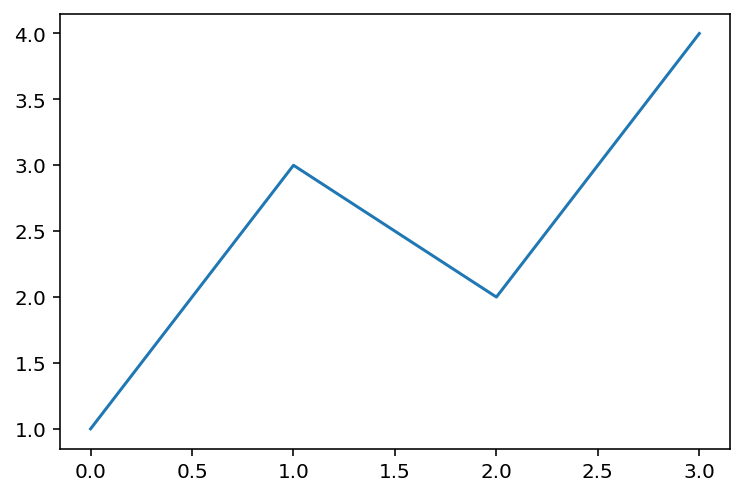

In [2]:
plt.plot([1,3,2,4])
plt.show() # To display the plot after layering multiple elements to the plot

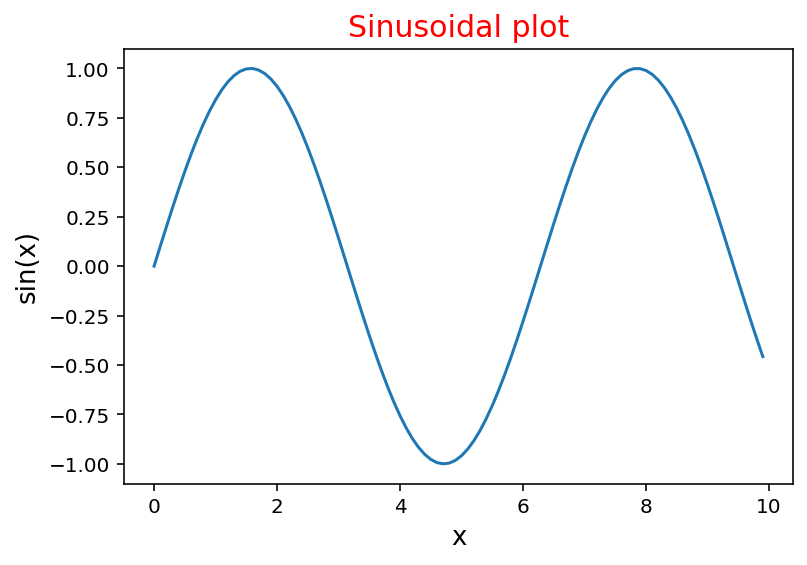

In [3]:
x = np.arange(0, 10, 0.1)
y = np.sin(x)
plt.plot(x, y)
plt.title('Sinusoidal plot', fontsize = 15, color = 'r')
plt.xlabel('x', fontsize = 13)
plt.ylabel('sin(x)', fontsize = 13)
plt.show()

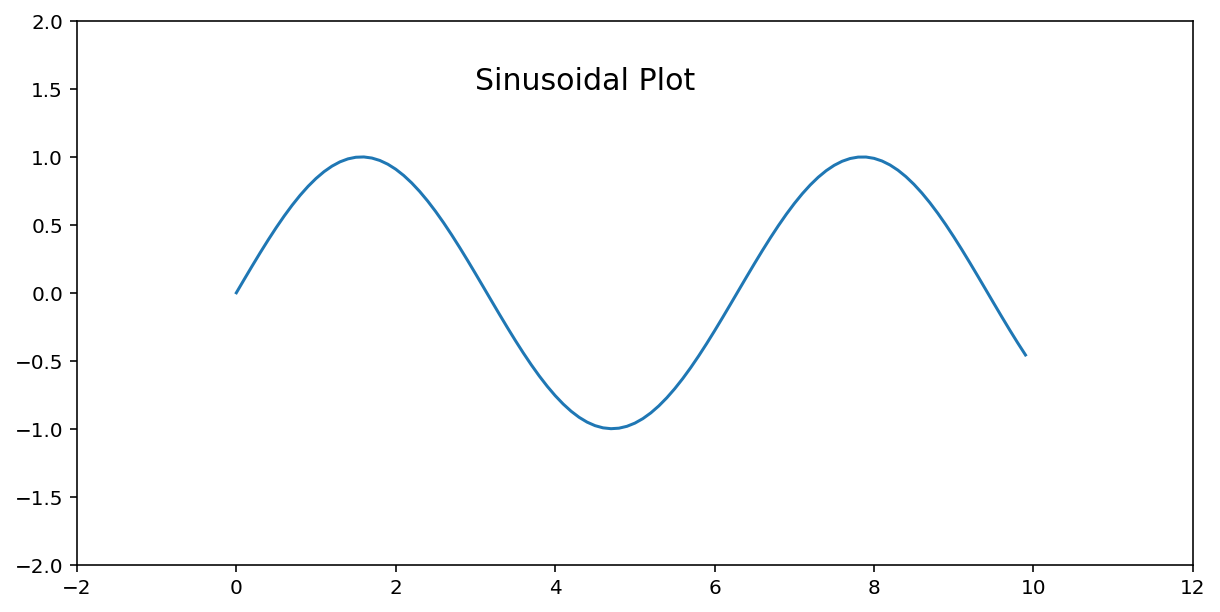

In [4]:
plt.figure(figsize = (10,5)) # 10 inches wide X 5 inches tall
plt.plot(x,y)
plt.axis([-2,12,-2,2])  # [xmin, xmax, ymin, ymax]
plt.annotate('Sinusoidal Plot', (3,1.5), fontsize = 15)
plt.show()

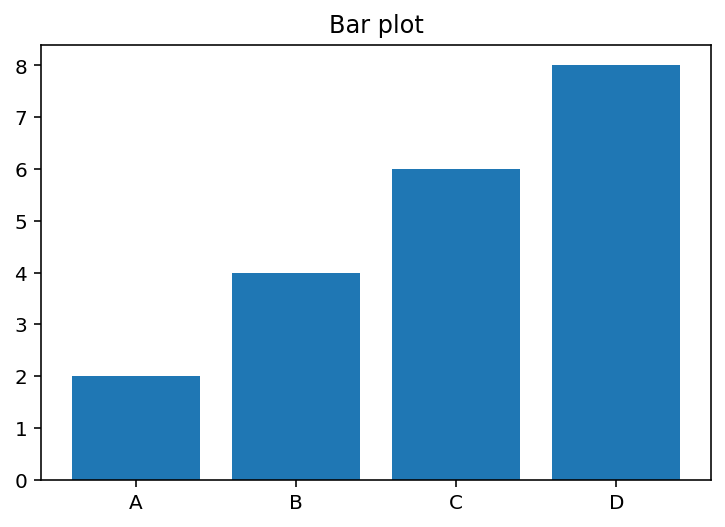

In [5]:
x = [1,2,3,4]
y = [2,4,6,8]
plt.bar(x,y)
plt.xticks(x, ['A','B','C','D'])
plt.title("Bar plot")
plt.show()

In [3]:
# Loading dataset
df = pd.read_csv('adult_income.csv')
#df['income'] = df['income'].map({'<=50K':0, '>50K':1})
df.shape

(48842, 15)

In [7]:
df.head(3)

age  workclass  fnlwgt   education  educational-num      marital-status  \
0   25    Private  226802        11th                7       Never-married   
1   38    Private   89814     HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951  Assoc-acdm               12  Married-civ-spouse   

          occupation relationship   race gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black   Male             0             0   
1    Farming-fishing      Husband  White   Male             0             0   
2    Protective-serv      Husband  White   Male             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K

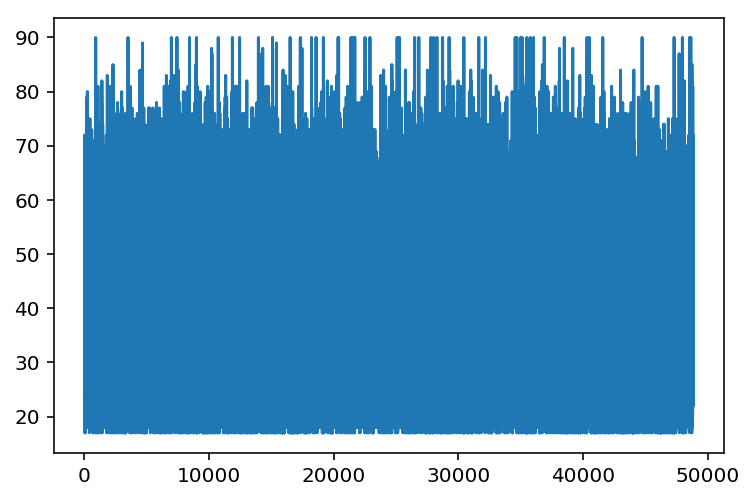

In [8]:
plt.plot(df['age'])
plt.show()

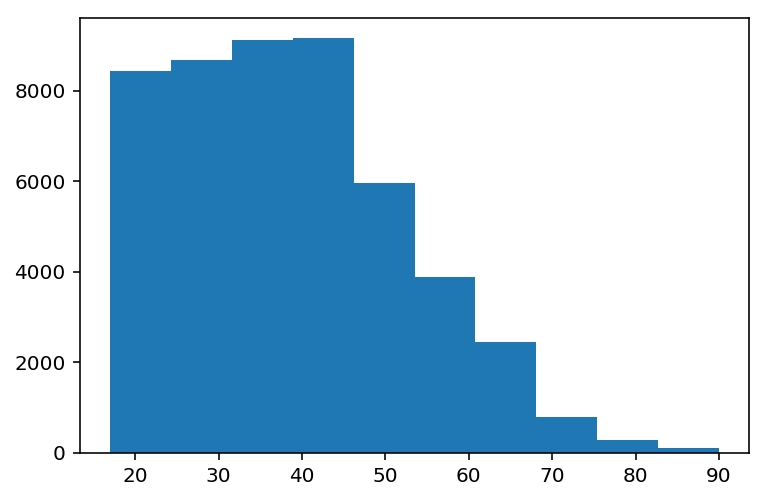

In [9]:
plt.hist(df['age'], )#bins = [10,20,30,40,50,60]
plt.show()

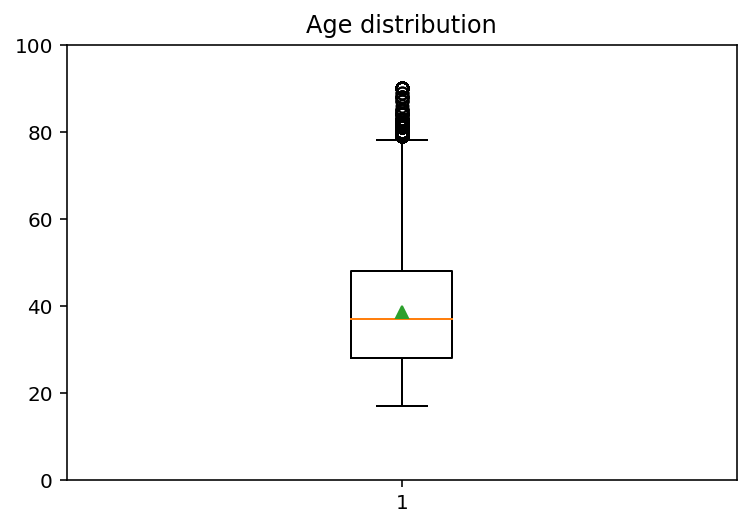

In [10]:
plt.boxplot(df['age'],showmeans = True)
plt.ylim([0,100])
plt.title("Age distribution")
plt.show()

In [11]:
df.groupby('income').size()

income
<=50K    37155
>50K     11687
dtype: int64

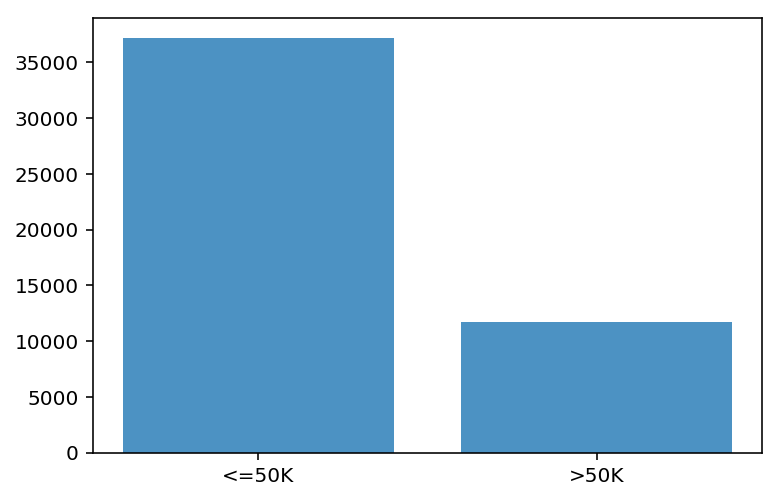

In [12]:
# Bar plot for Categorical varibales

plt.bar(df.groupby('income').size().index, df.groupby('income').size(), alpha = 0.8)
plt.show()

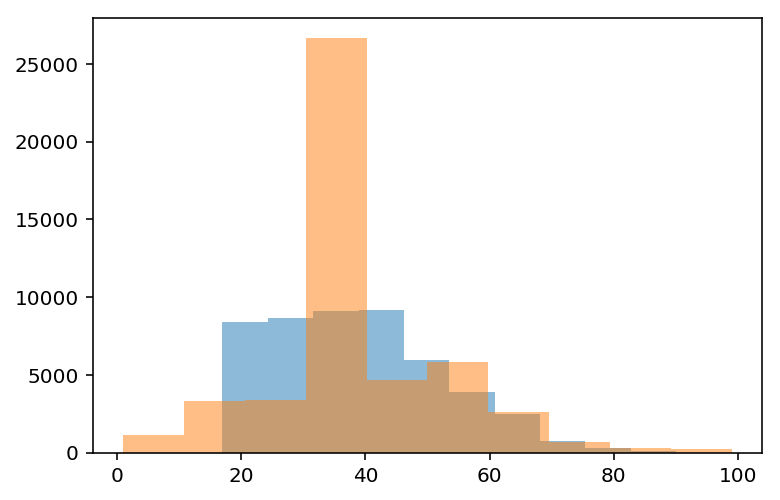

In [13]:
# Overlapped Histogram plots
plt.hist(df['age'], alpha = 0.5)
plt.hist(df['hours-per-week'], alpha = 0.5)
plt.show()

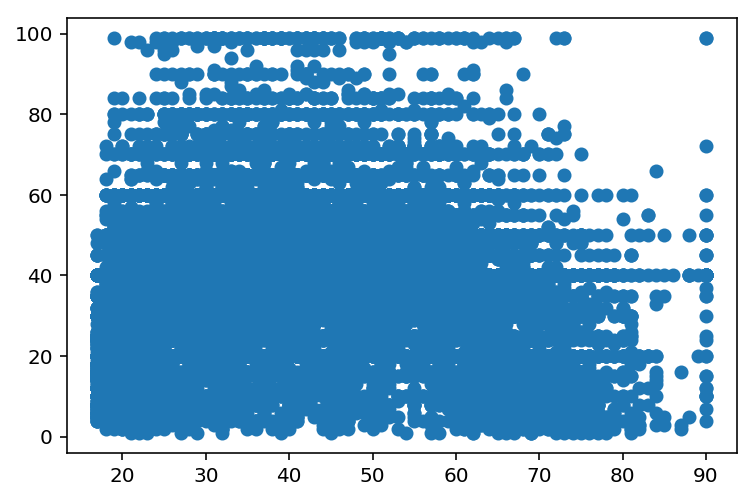

In [14]:
# Scatter Plot 

plt.scatter(df['age'], df['hours-per-week'])
plt.show()

#### Subplots

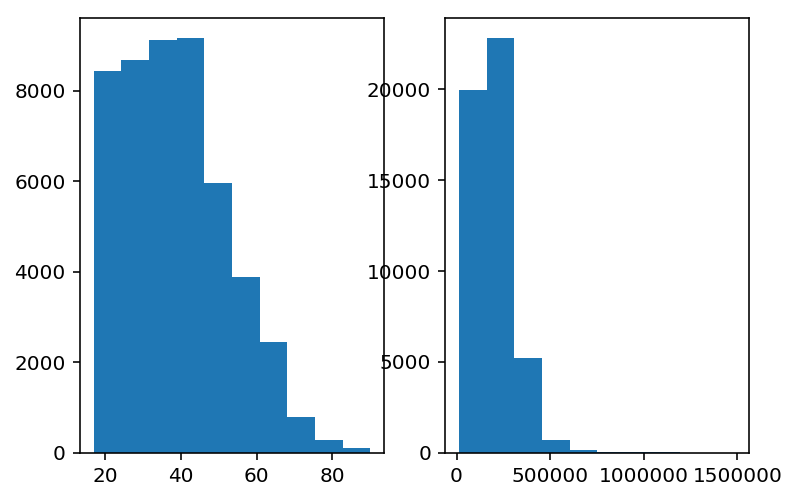

In [15]:
plt.subplot(121)
#plt.subplot(1,2,1)
plt.hist(df['age'])

plt.subplot(122)
#plt.subplot(1,2,2)
plt.hist(df['fnlwgt'])
plt.show()

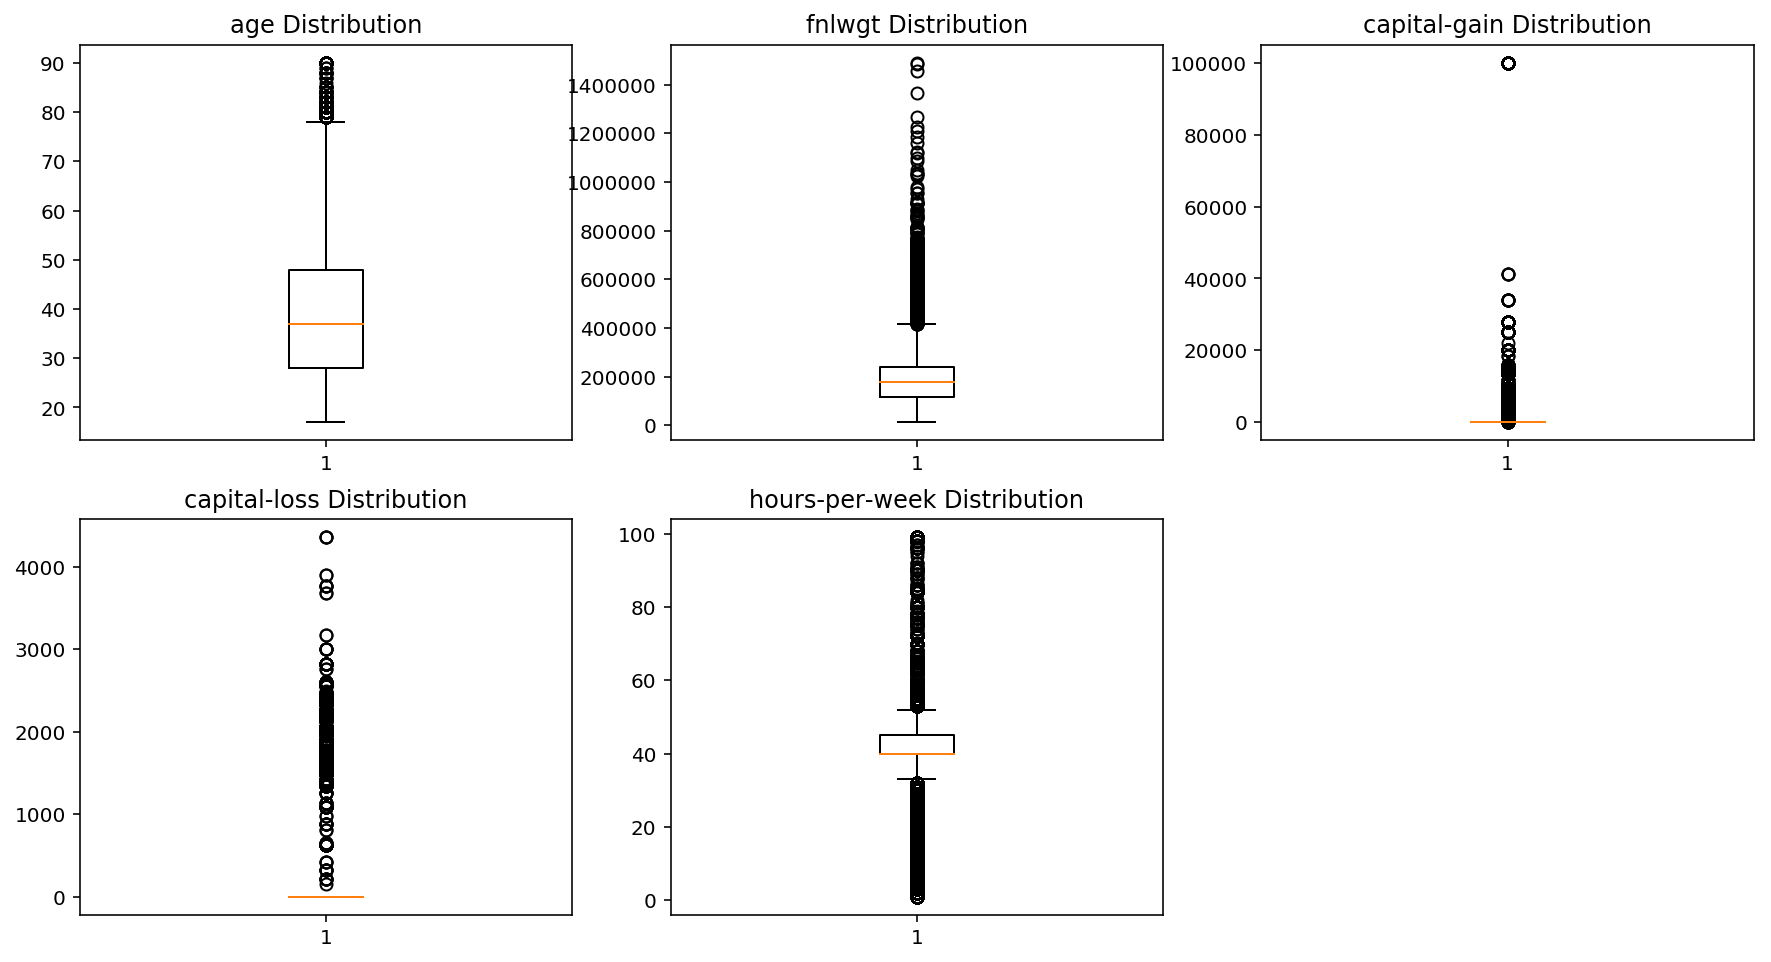

In [16]:
features = ['age','fnlwgt','capital-gain','capital-loss','hours-per-week']

plt.figure(figsize = (15,8))

for number,col in enumerate(features):
    location = '23'+str(number+1)
    plt.subplot(location)
    plt.boxplot(df[col])
    plt.title(col+" Distribution")

plt.show()

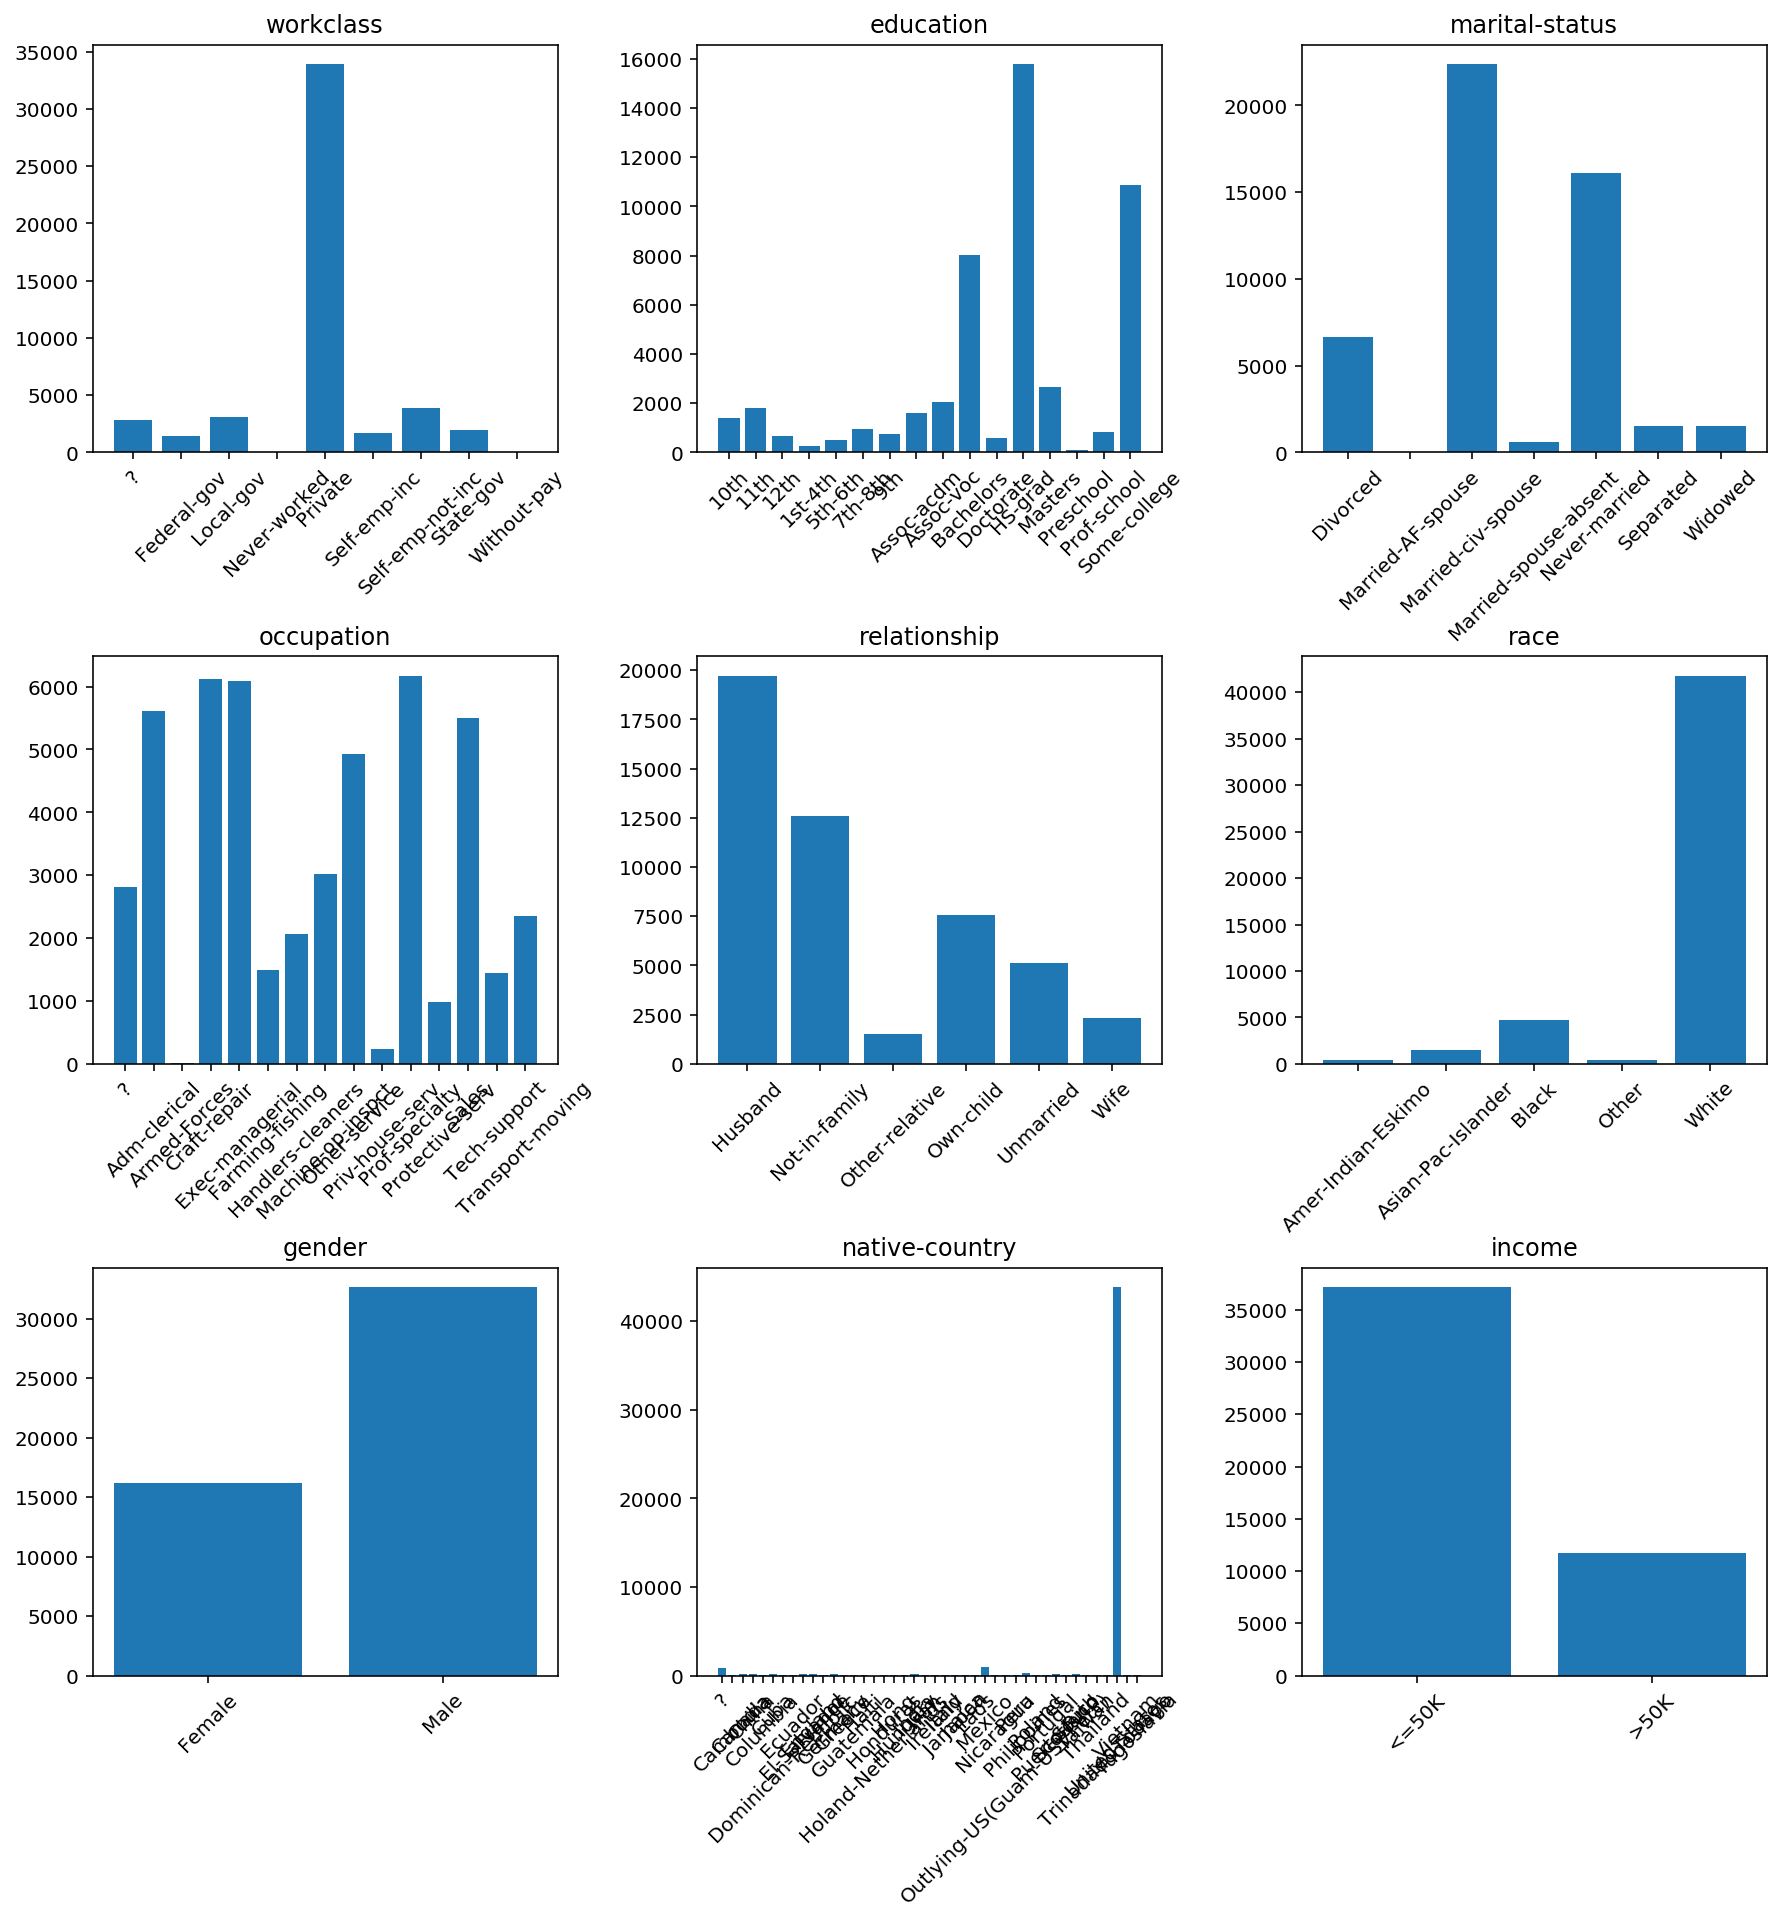

In [17]:
features = ['workclass','education','marital-status', 'occupation', 'relationship','race','gender','native-country','income']

plt.figure(figsize = (15,15))

for number,col in enumerate(features):
    location = '33'+str(number+1)
    plt.subplot(location)
    plt.bar(df.groupby(col).size().index, df.groupby(col).size())
    plt.title(col)
    plt.xticks(rotation = 45)
    
plt.subplots_adjust(hspace=.5, wspace = 0.3)
plt.show()

### Visualization using Pandas

Pandas has a built in .plot() function as part of the DataFrame class. It has several key parameters:<br>

**kind** — 'line','box','bar',’barh’,’pie’,’scatter’,’kde’ etc which can be found in the docs.<br>
**color** — Which accepts and array of hex codes corresponding sequential to each data series / column.<br>
**linestyle** — ‘solid’, ‘dotted’, ‘dashed’ (applies to line graphs only)<br>
**xlim, ylim** — specify a tuple (lower limit, upper limit) for which the plot will be drawn<br>
**legend** — a boolean value to display or hide the legend<br>
**subplots** —  a boolean vlaue, default False. Make separate subplots for each column<br>
**title** — The string title of the plot<br>

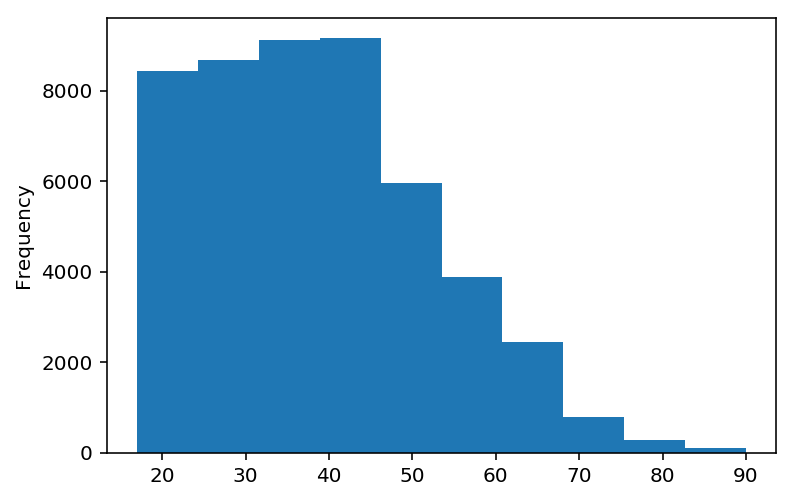

In [18]:
df['age'].plot(kind = 'hist')
#df['age'].plot.hist()
plt.show()

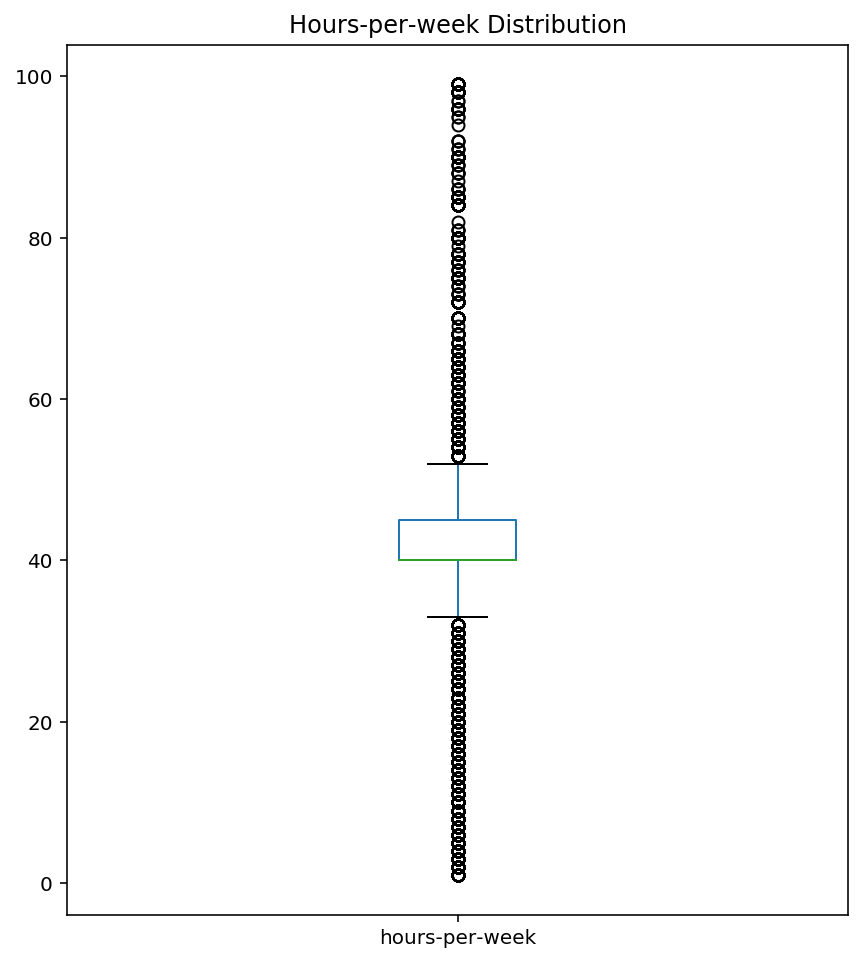

In [19]:
df['hours-per-week'].plot(kind = 'box', title = 'Boxplot', figsize = (7,8))
plt.title("Hours-per-week Distribution")
plt.show()

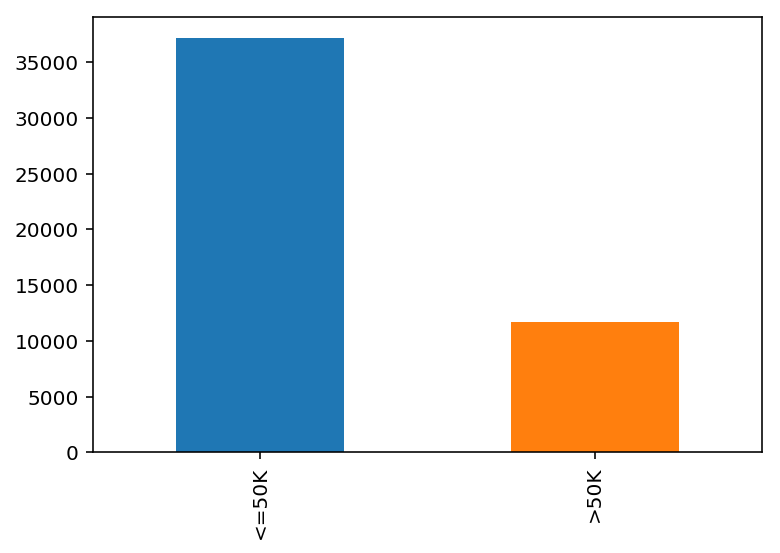

In [20]:
df['income'].value_counts().plot.bar()
plt.show()

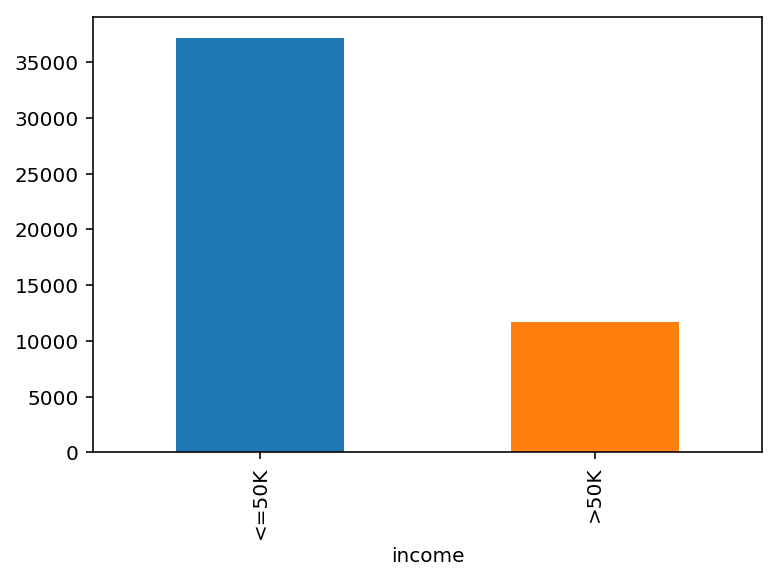

In [21]:
df.groupby('income').size().plot(kind = 'bar')
plt.show()

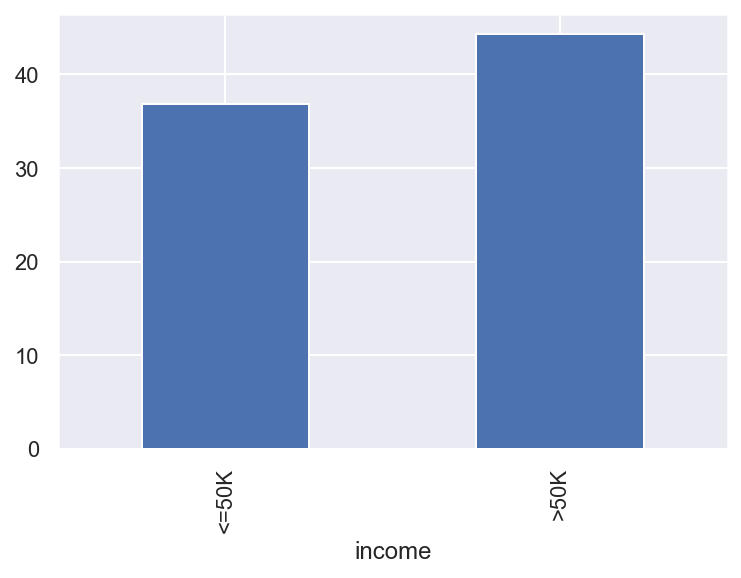

In [37]:
df.groupby('income')['age'].mean().plot(kind = 'bar')

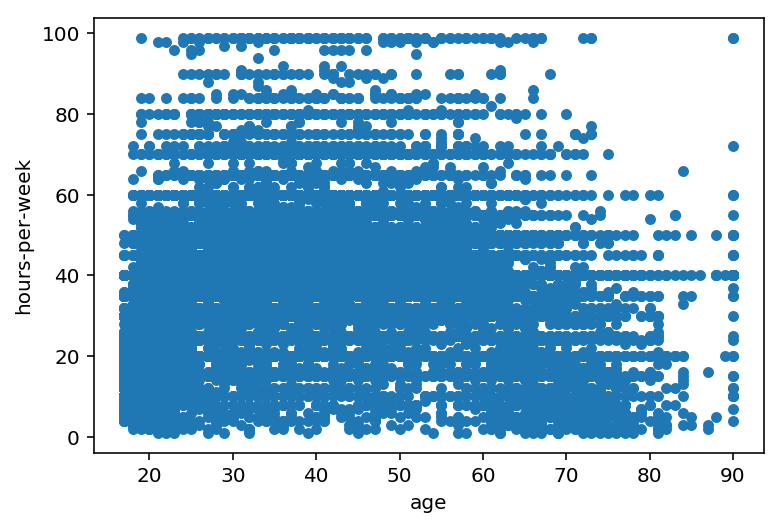

In [22]:
df.plot(x = 'age', y = 'hours-per-week' , kind = 'scatter')
plt.show()

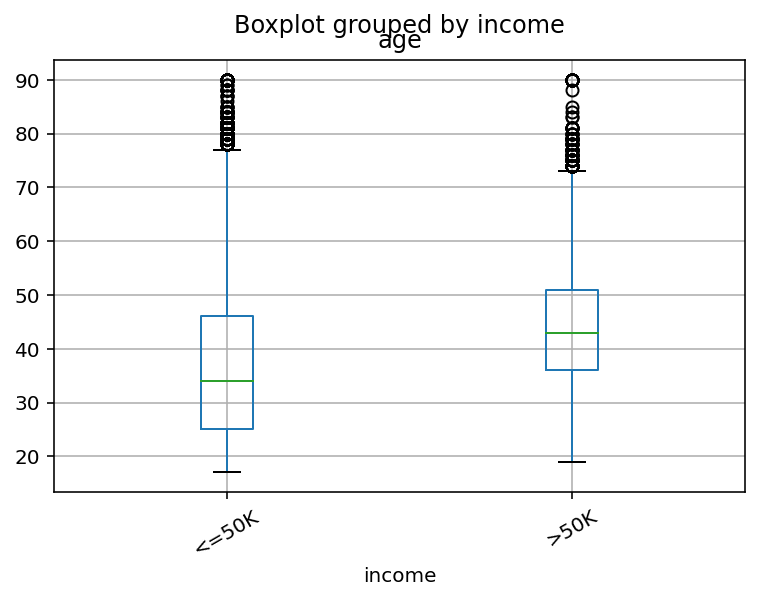

In [15]:
df.boxplot('age', by = 'income', rot = 30)
plt.show()

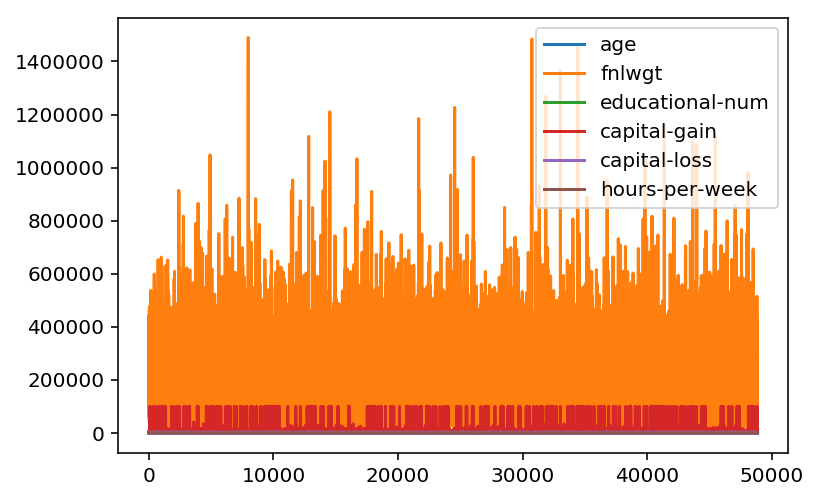

In [23]:
df.plot()
plt.show()

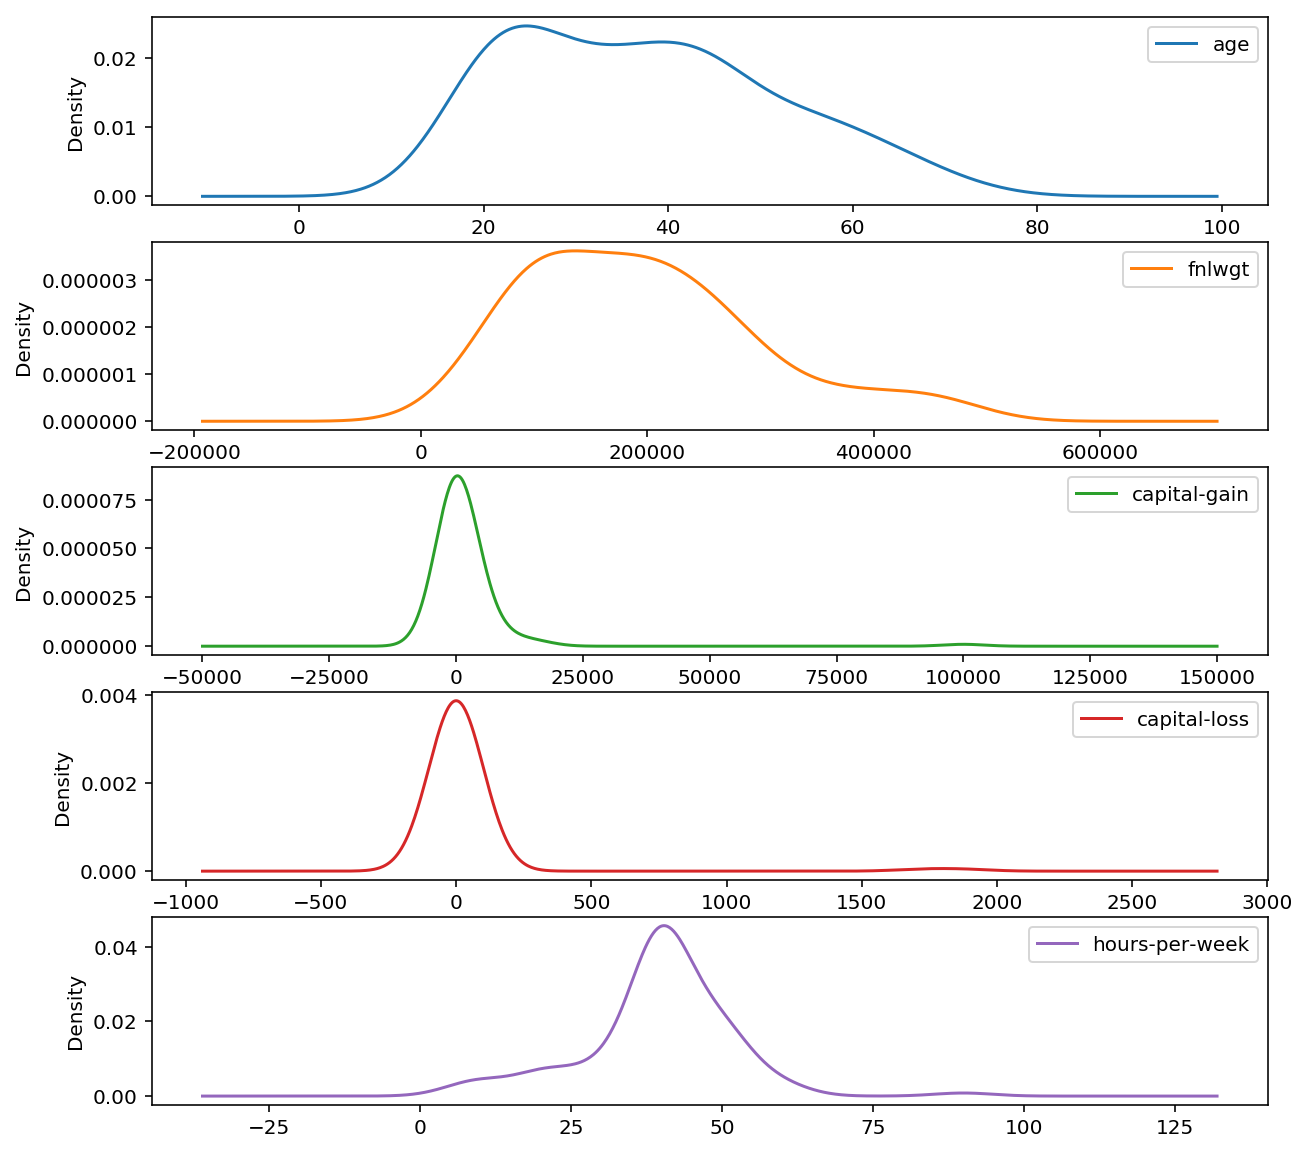

In [24]:
features = ['age','fnlwgt','capital-gain', 'capital-loss', 'hours-per-week']
df[features].head(100).plot(kind='density', subplots=True, sharex=False, figsize = (10,10))
plt.show()

### Visualization using Seaborn

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

#### Keys Features
* Seaborn is a statistical plotting library
* It has beautiful default styles
* It also is designed to work very well with Pandas dataframe objects.

To install the latest release of seaborn, you can use pip/conda:<br>

!pip install seaborn==0.9.0<br>
!conda install seaborn==0.9.0

**Make sure to use version greater than 0.9.0. Use below command to update to latest version**<br>

!pip install -U seaborn --user 

In [24]:
import seaborn as sns
sns.set() #Set aesthetic parameters in one step. Here we applied the default default seaborn theme, scaling, and color palette

In [25]:
print(sns.__version__)

0.9.0


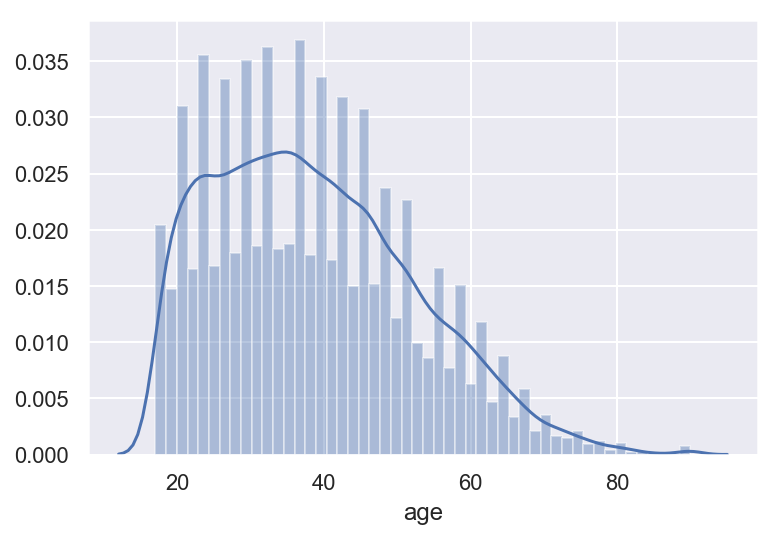

In [27]:
sns.distplot(df['age'])#, kde=False)
#sns.kdeplot(df['age'], shade=True)

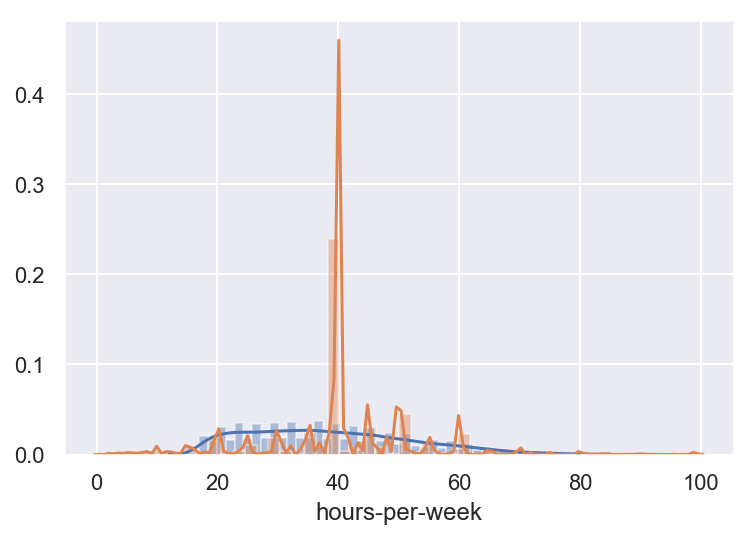

In [28]:
#plt.figure(figsize = (10,10))
sns.distplot(df['age'])
sns.distplot(df['hours-per-week'])

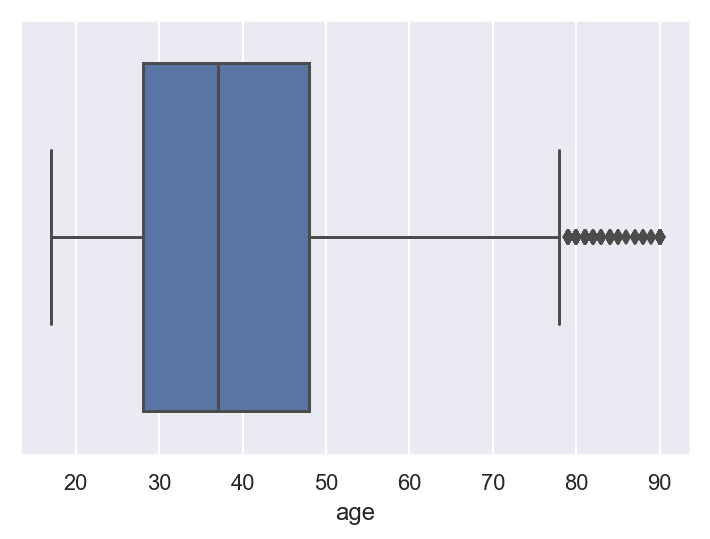

In [29]:
sns.boxplot(df['age'])

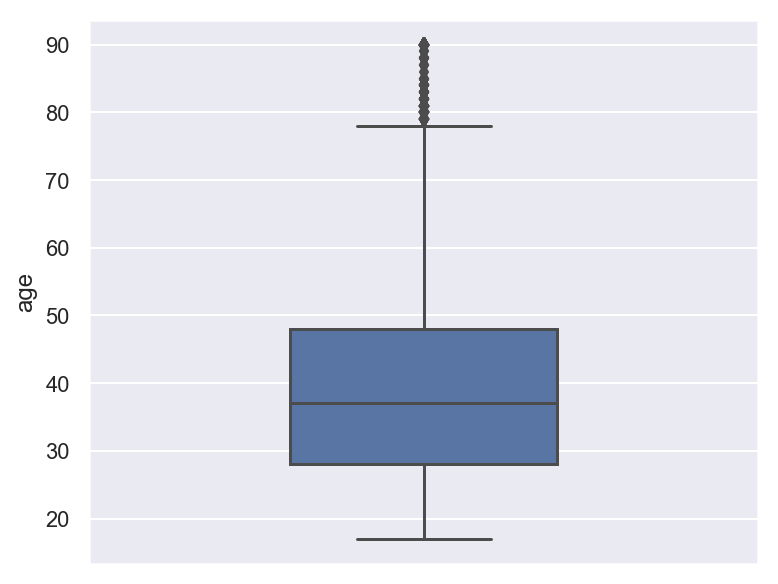

In [30]:
plt.figure(figsize = (6,5))
sns.boxplot(df['age'], orient="v", width = 0.4)

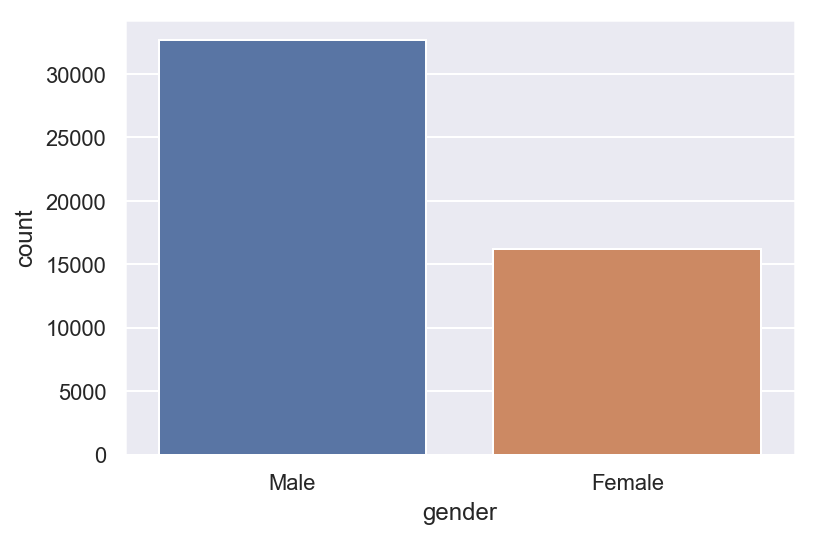

In [31]:
sns.countplot('gender', data = df)
#sns.countplot(df['gender'])

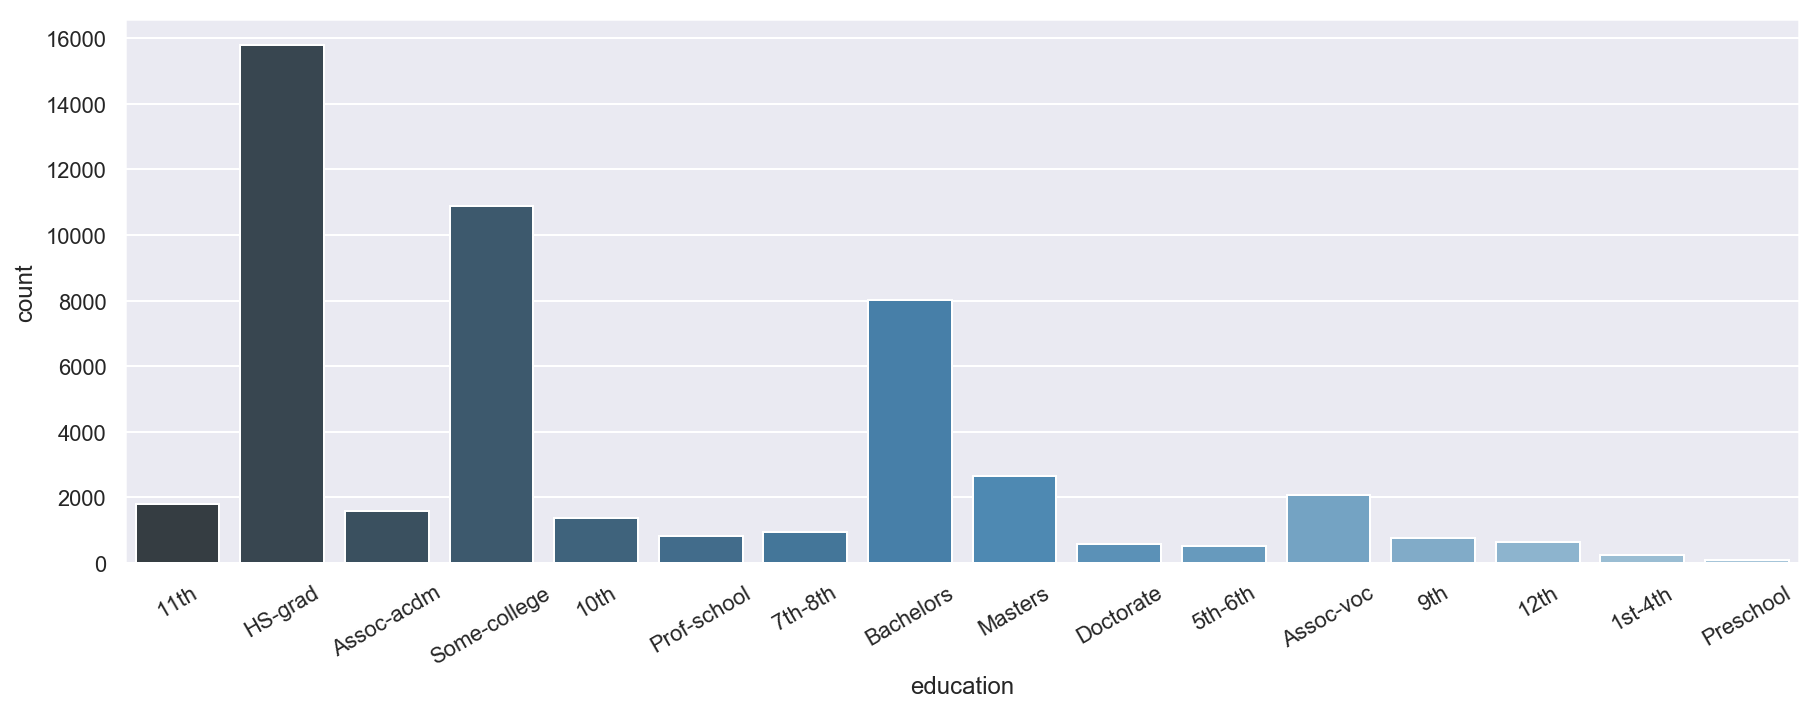

In [32]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 30)
sns.countplot('education', data = df, palette = 'Blues_d')
#sns.countplot('education', data = df,palette = 'Blues_d', order = df['education'].value_counts().index)

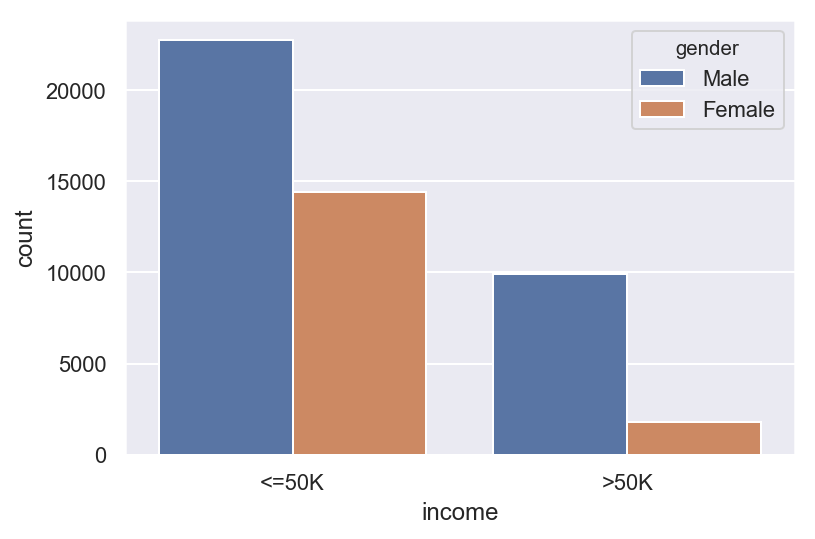

In [33]:
sns.countplot(x='income', data = df, hue = 'gender')

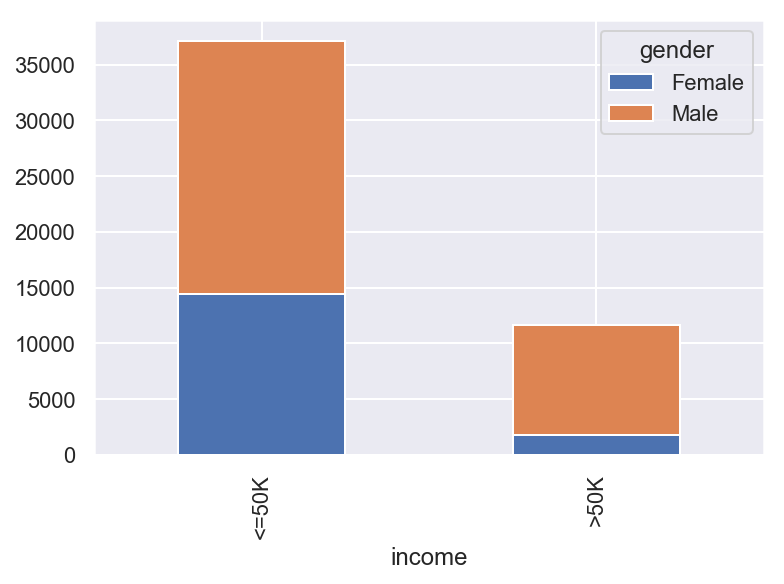

In [34]:
pd.crosstab(df['income'],df['gender']).plot(kind = 'bar', stacked = True)
#pd.crosstab(df['income'],df['gender'], normalize = True).plot(kind = 'bar', stacked = True)

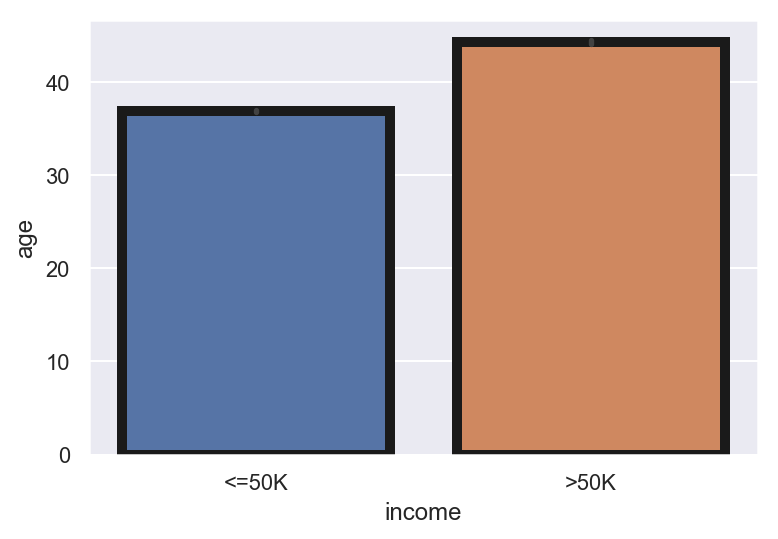

In [35]:
sns.barplot('income','age', data = df, linewidth=5, edgecolor = 'k', saturation = 0.8)

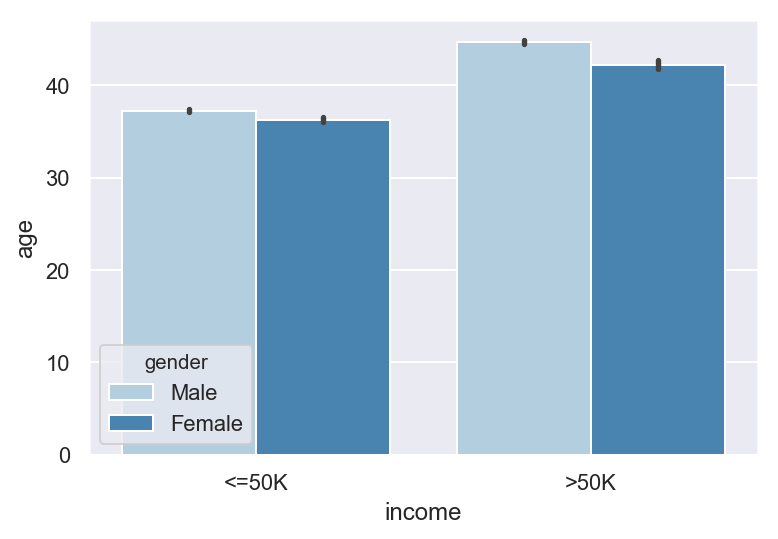

In [36]:
sns.barplot('income','age', data = df, hue = 'gender', palette = 'Blues')

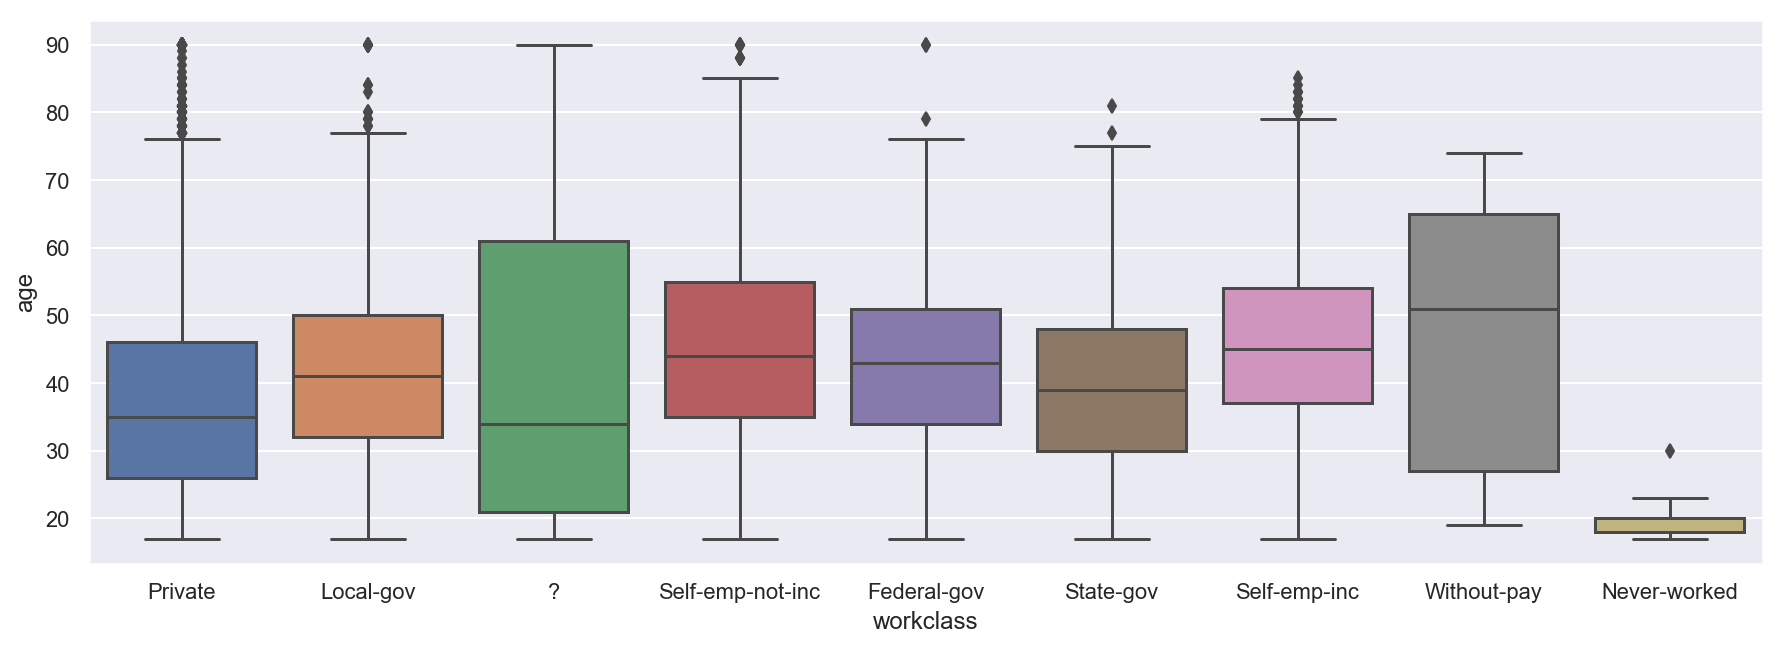

In [37]:
plt.figure(figsize = (15,5))
sns.boxplot('workclass', 'age', data = df)
#sns.boxplot('workclass', 'age', data = df, palette = 'Blues_d')

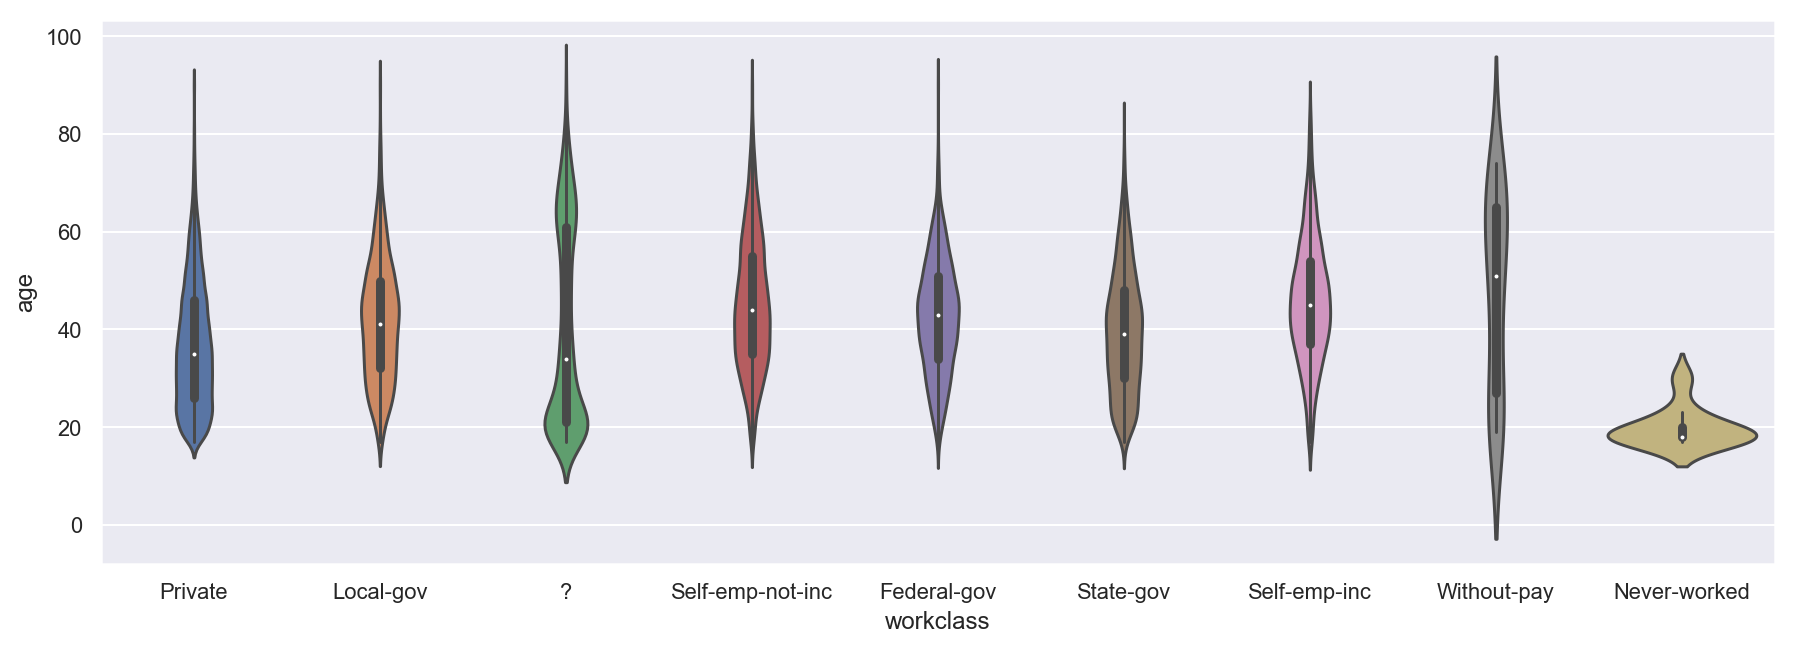

In [38]:
plt.figure(figsize = (15,5))
sns.violinplot('workclass', 'age', data = df)
#sns.boxplot('workclass', 'age', data = df, palette = 'Blues_d')

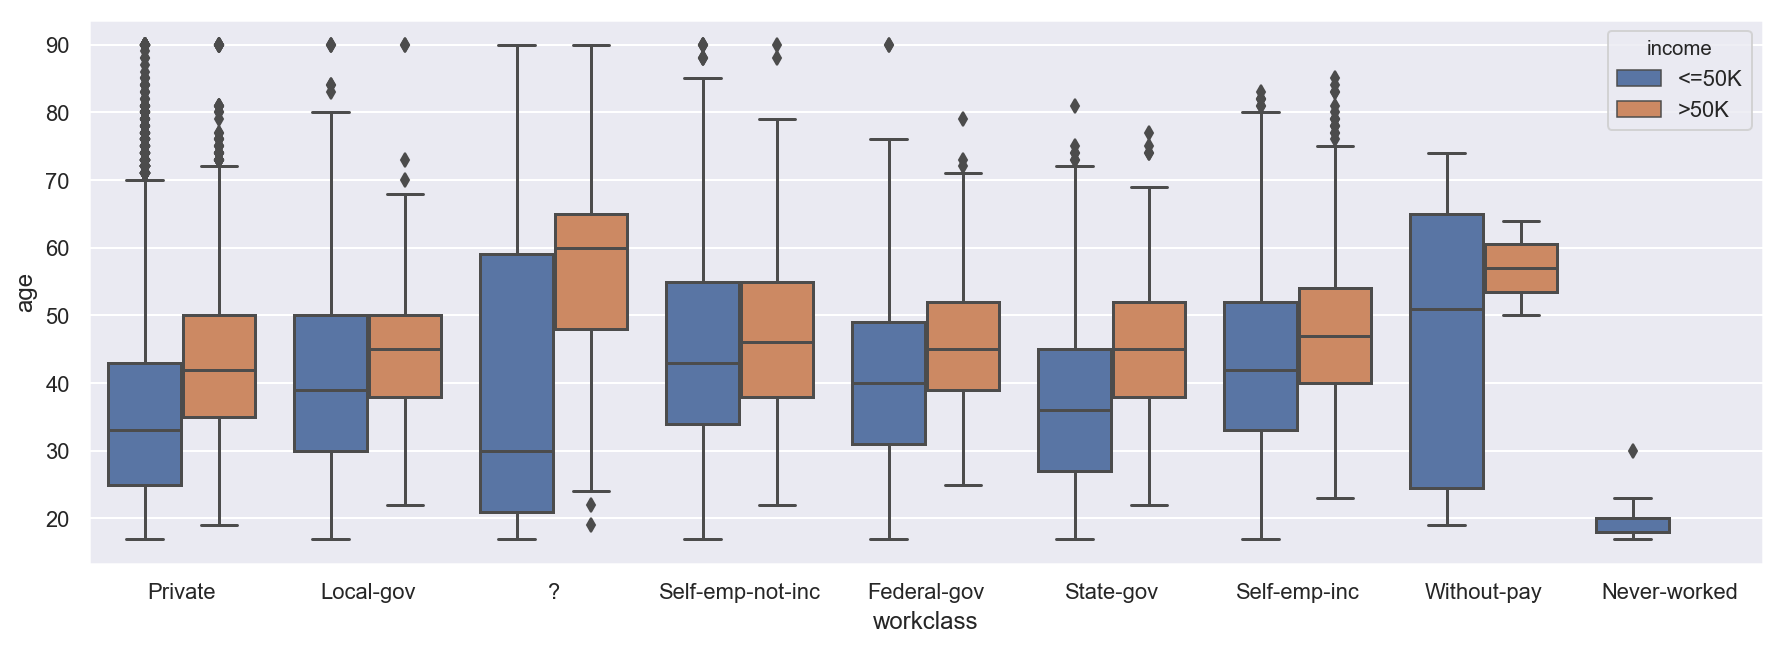

In [39]:
plt.figure(figsize = (15,5))
sns.boxplot('workclass', 'age', data = df, hue = 'income')
#sns.boxplot('workclass', 'age', data = df, hue = 'income', palette = 'Blues_d')

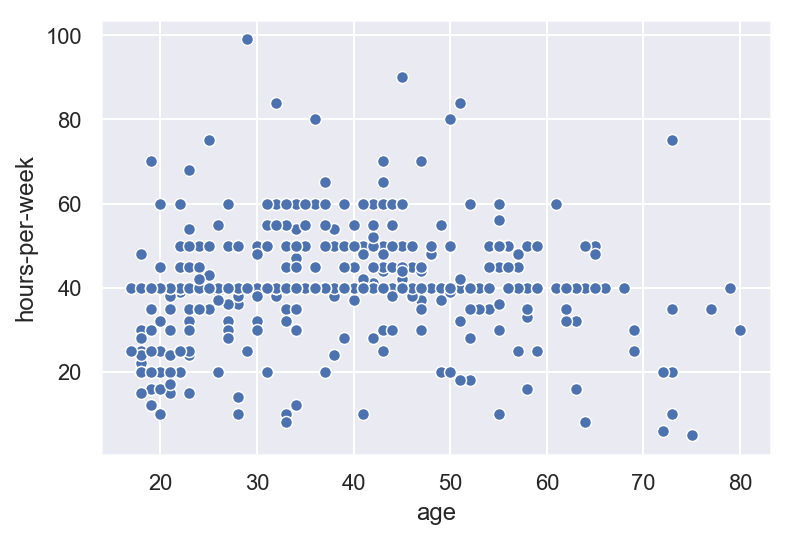

In [40]:
sns.scatterplot('age','hours-per-week', data = df.head(500))
#sns.scatterplot('age','hours-per-week', data = df.head(500), hue = 'income')

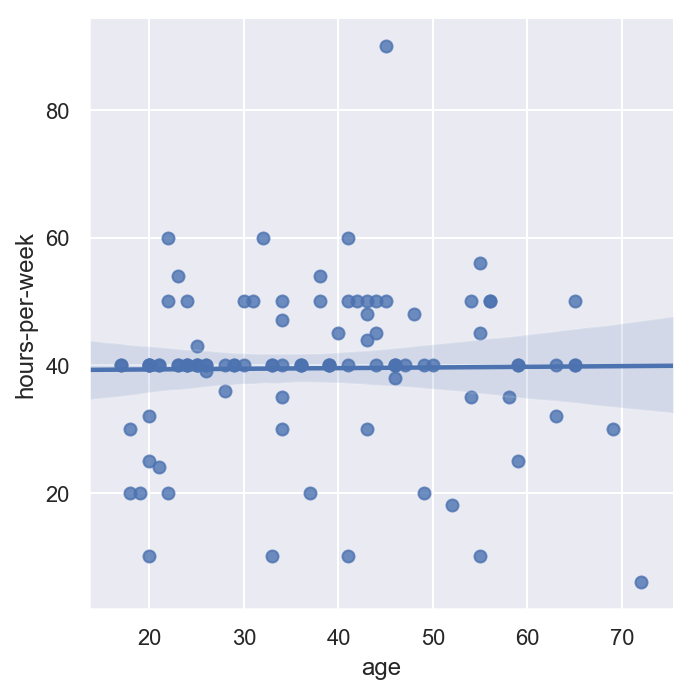

In [41]:
sns.lmplot('age','hours-per-week', data = df.head(100))
#sns.lmplot('age','hours-per-week', data = df.head(100), hue = 'income')

#### Facetgrid

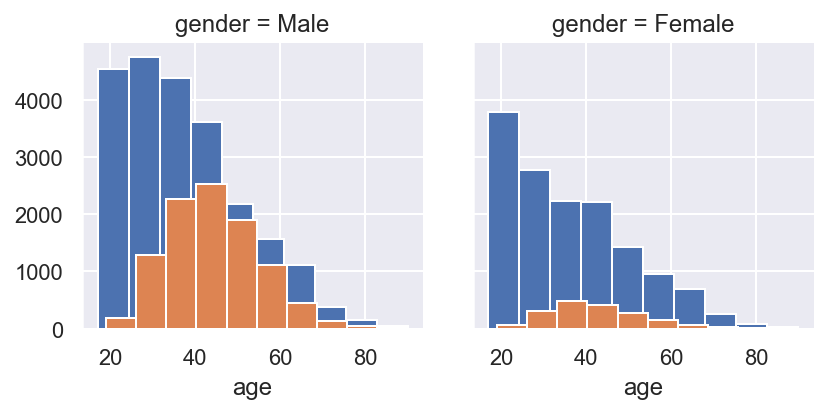

In [42]:
g = sns.FacetGrid(data = df, col = 'gender', hue = 'income')
g.map(plt.hist,'age')
#g.map(sns.distplot,'age')

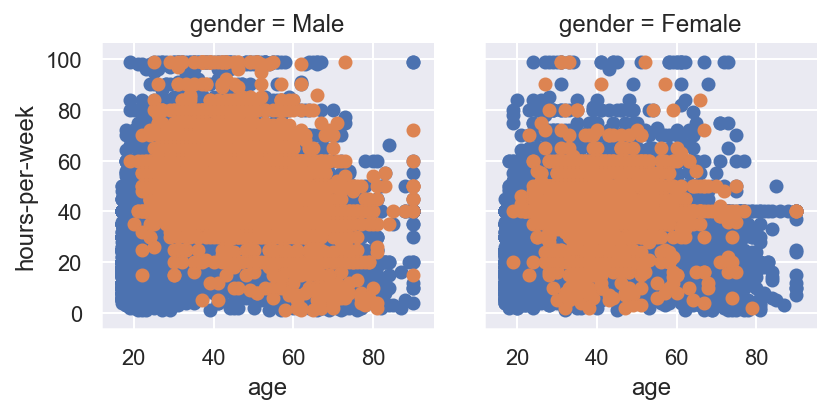

In [43]:
g = sns.FacetGrid(data = df, col = 'gender', hue = 'income')
g.map(plt.scatter,'age','hours-per-week')

#### Subplots

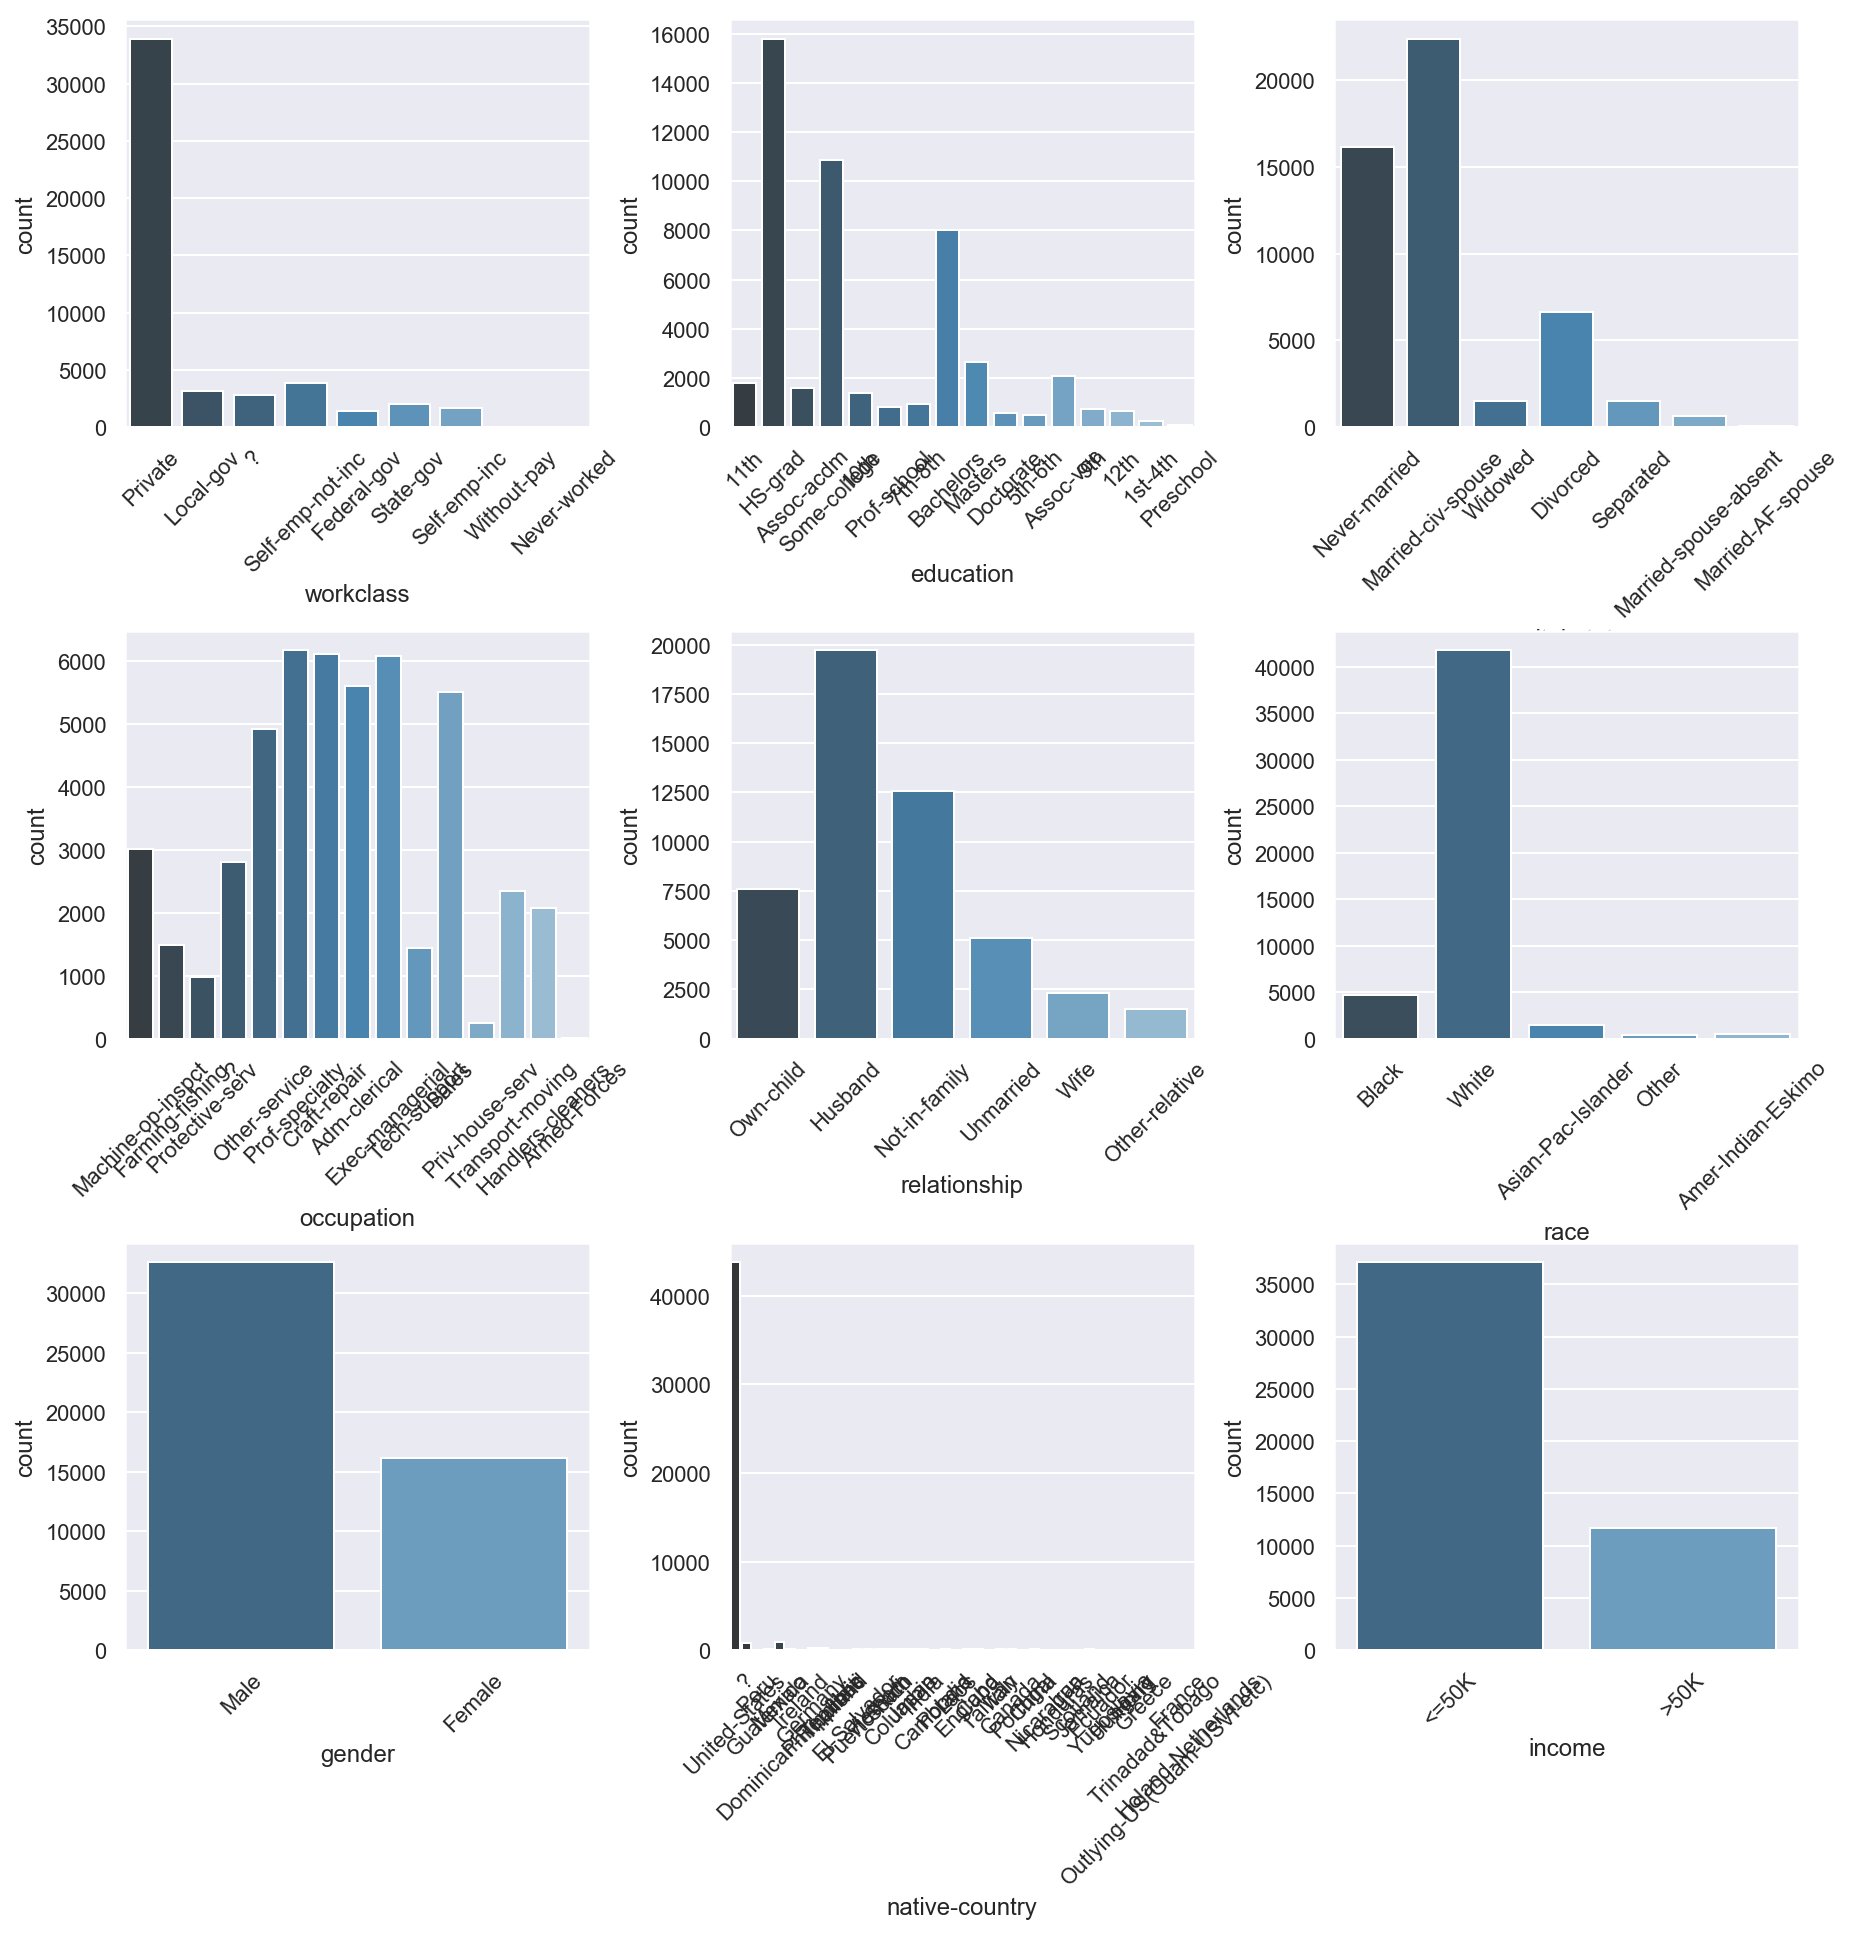

In [44]:
features = ['workclass','education','marital-status', 'occupation', 'relationship','race','gender','native-country','income']

plt.figure(figsize = (15,15))

for number,col in enumerate(features):
    location = '33'+str(number+1)
    plt.subplot(location)
    sns.countplot(col, data = df, palette = 'Blues_d')
    plt.xticks(rotation = 45)

plt.subplots_adjust(hspace=.5, wspace = 0.3)
plt.show()

#### Pairplot

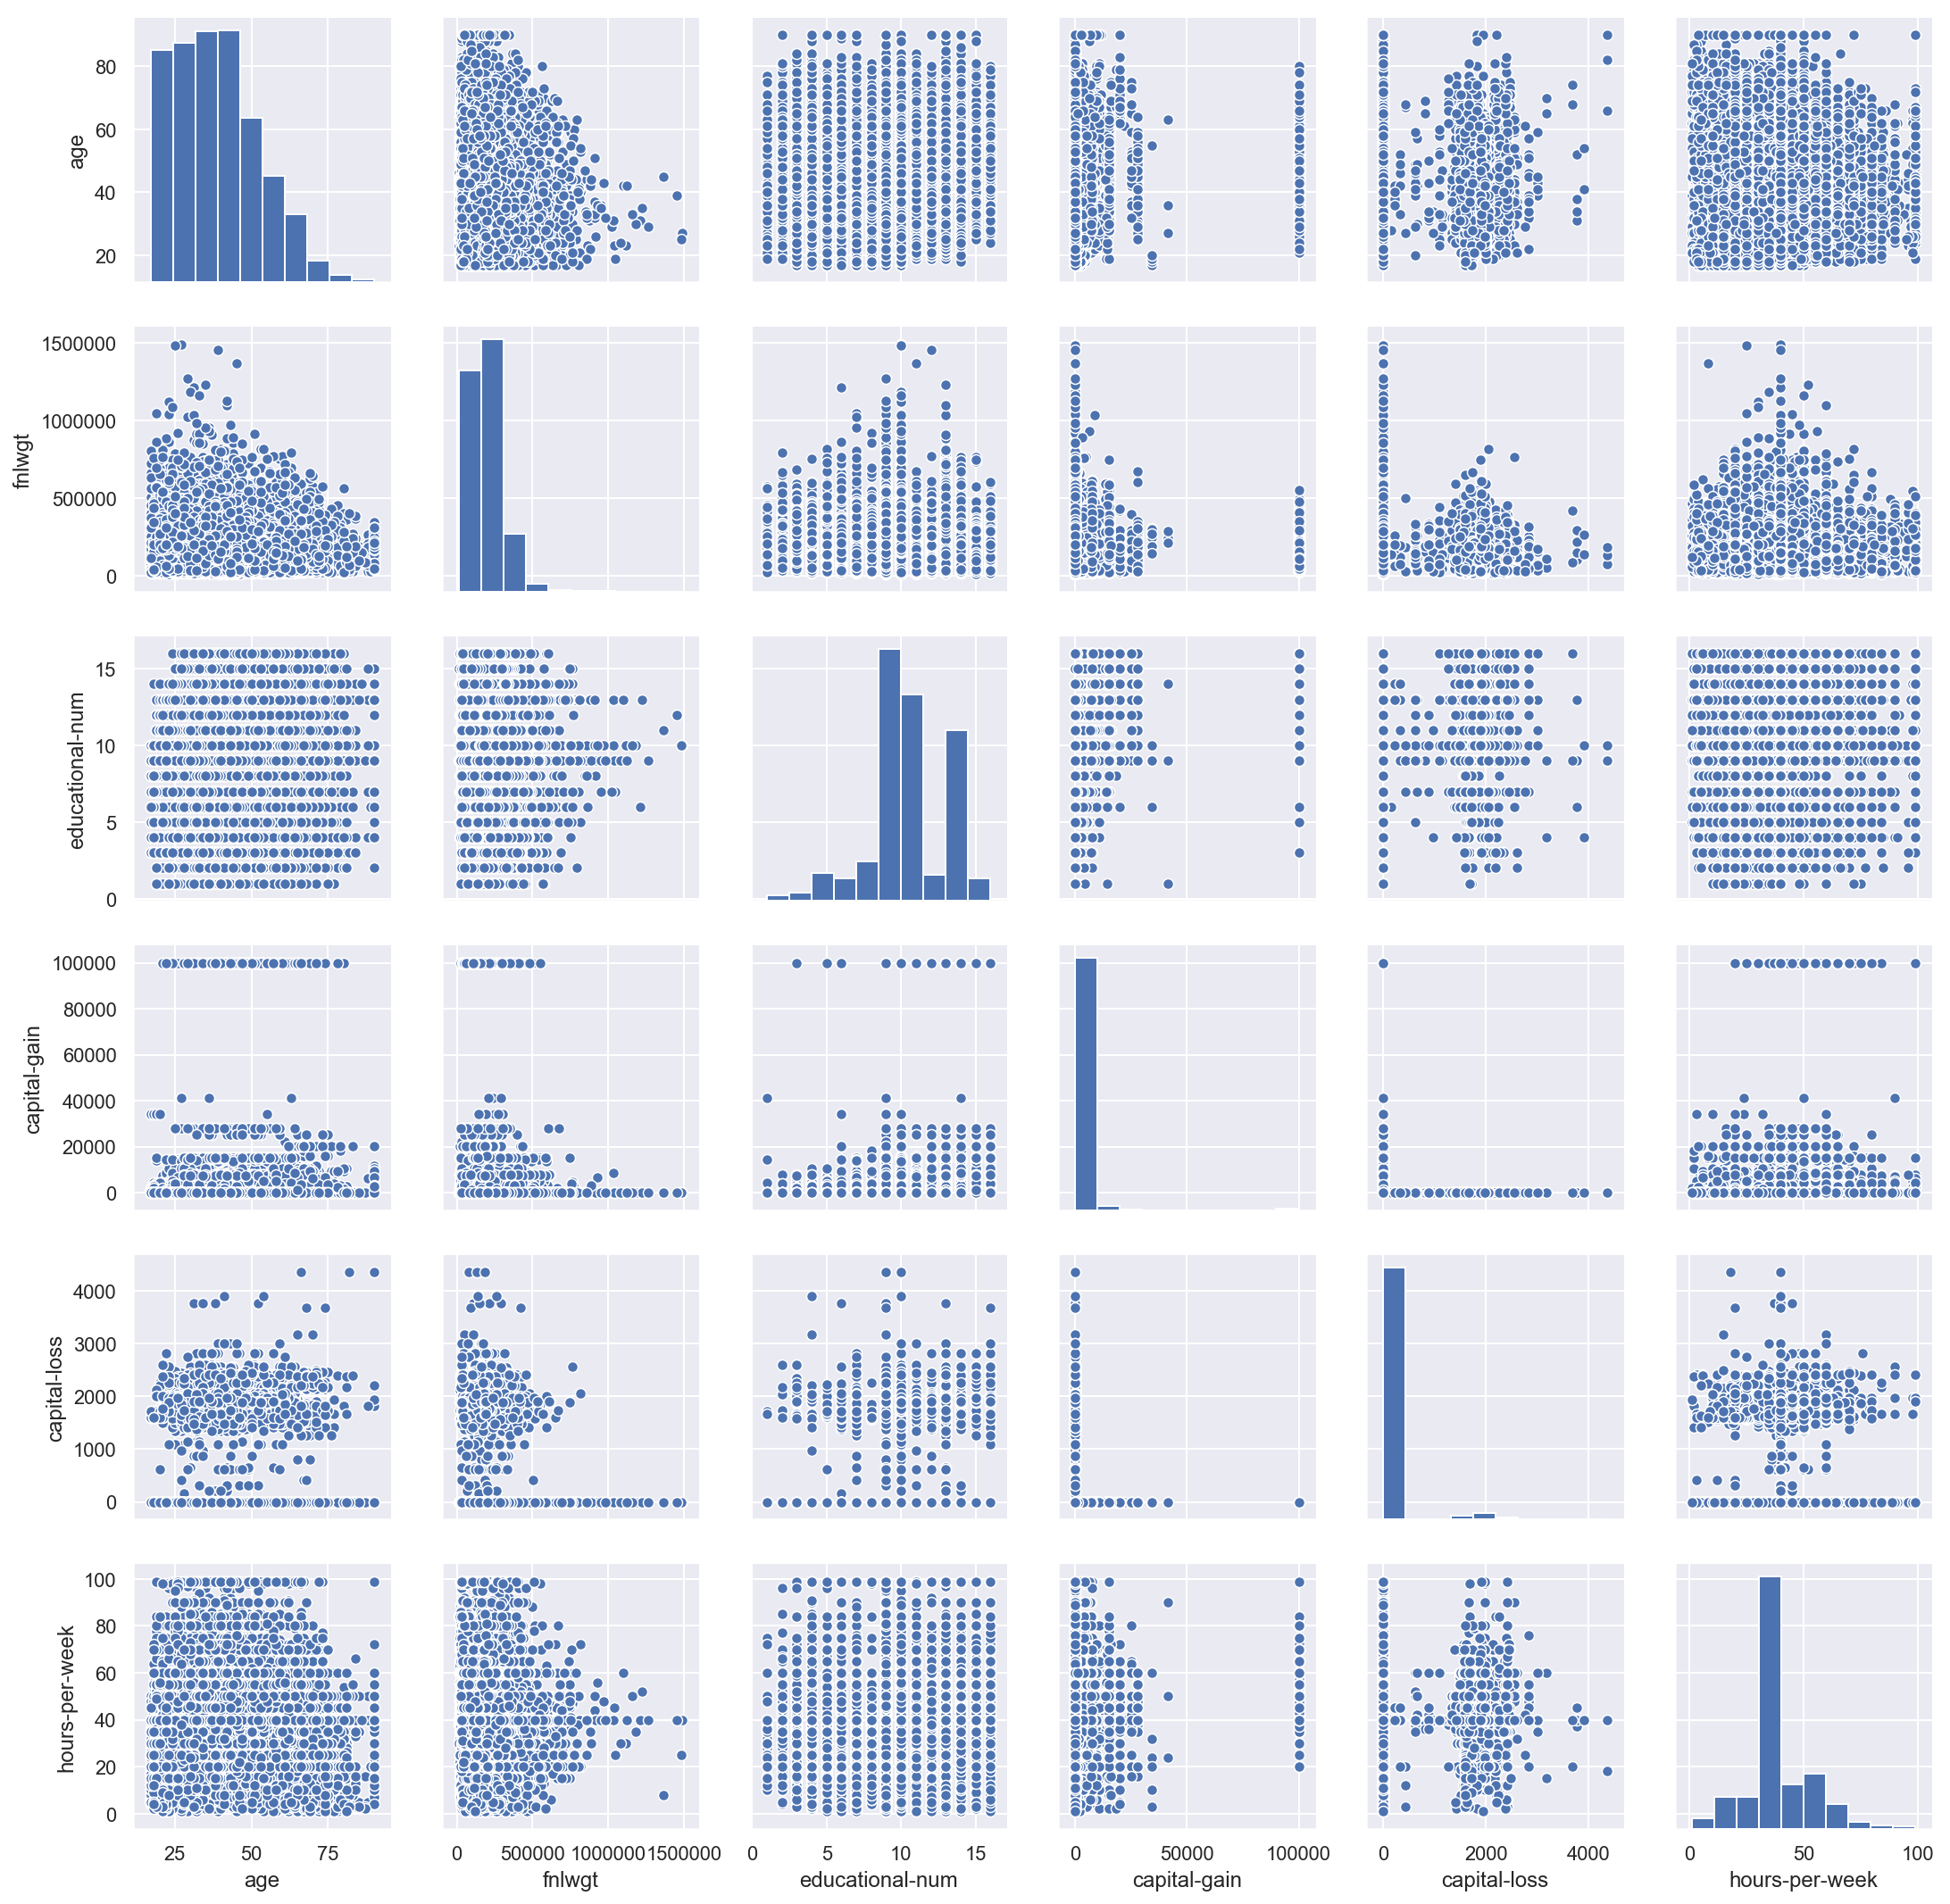

In [45]:
sns.pairplot(df)

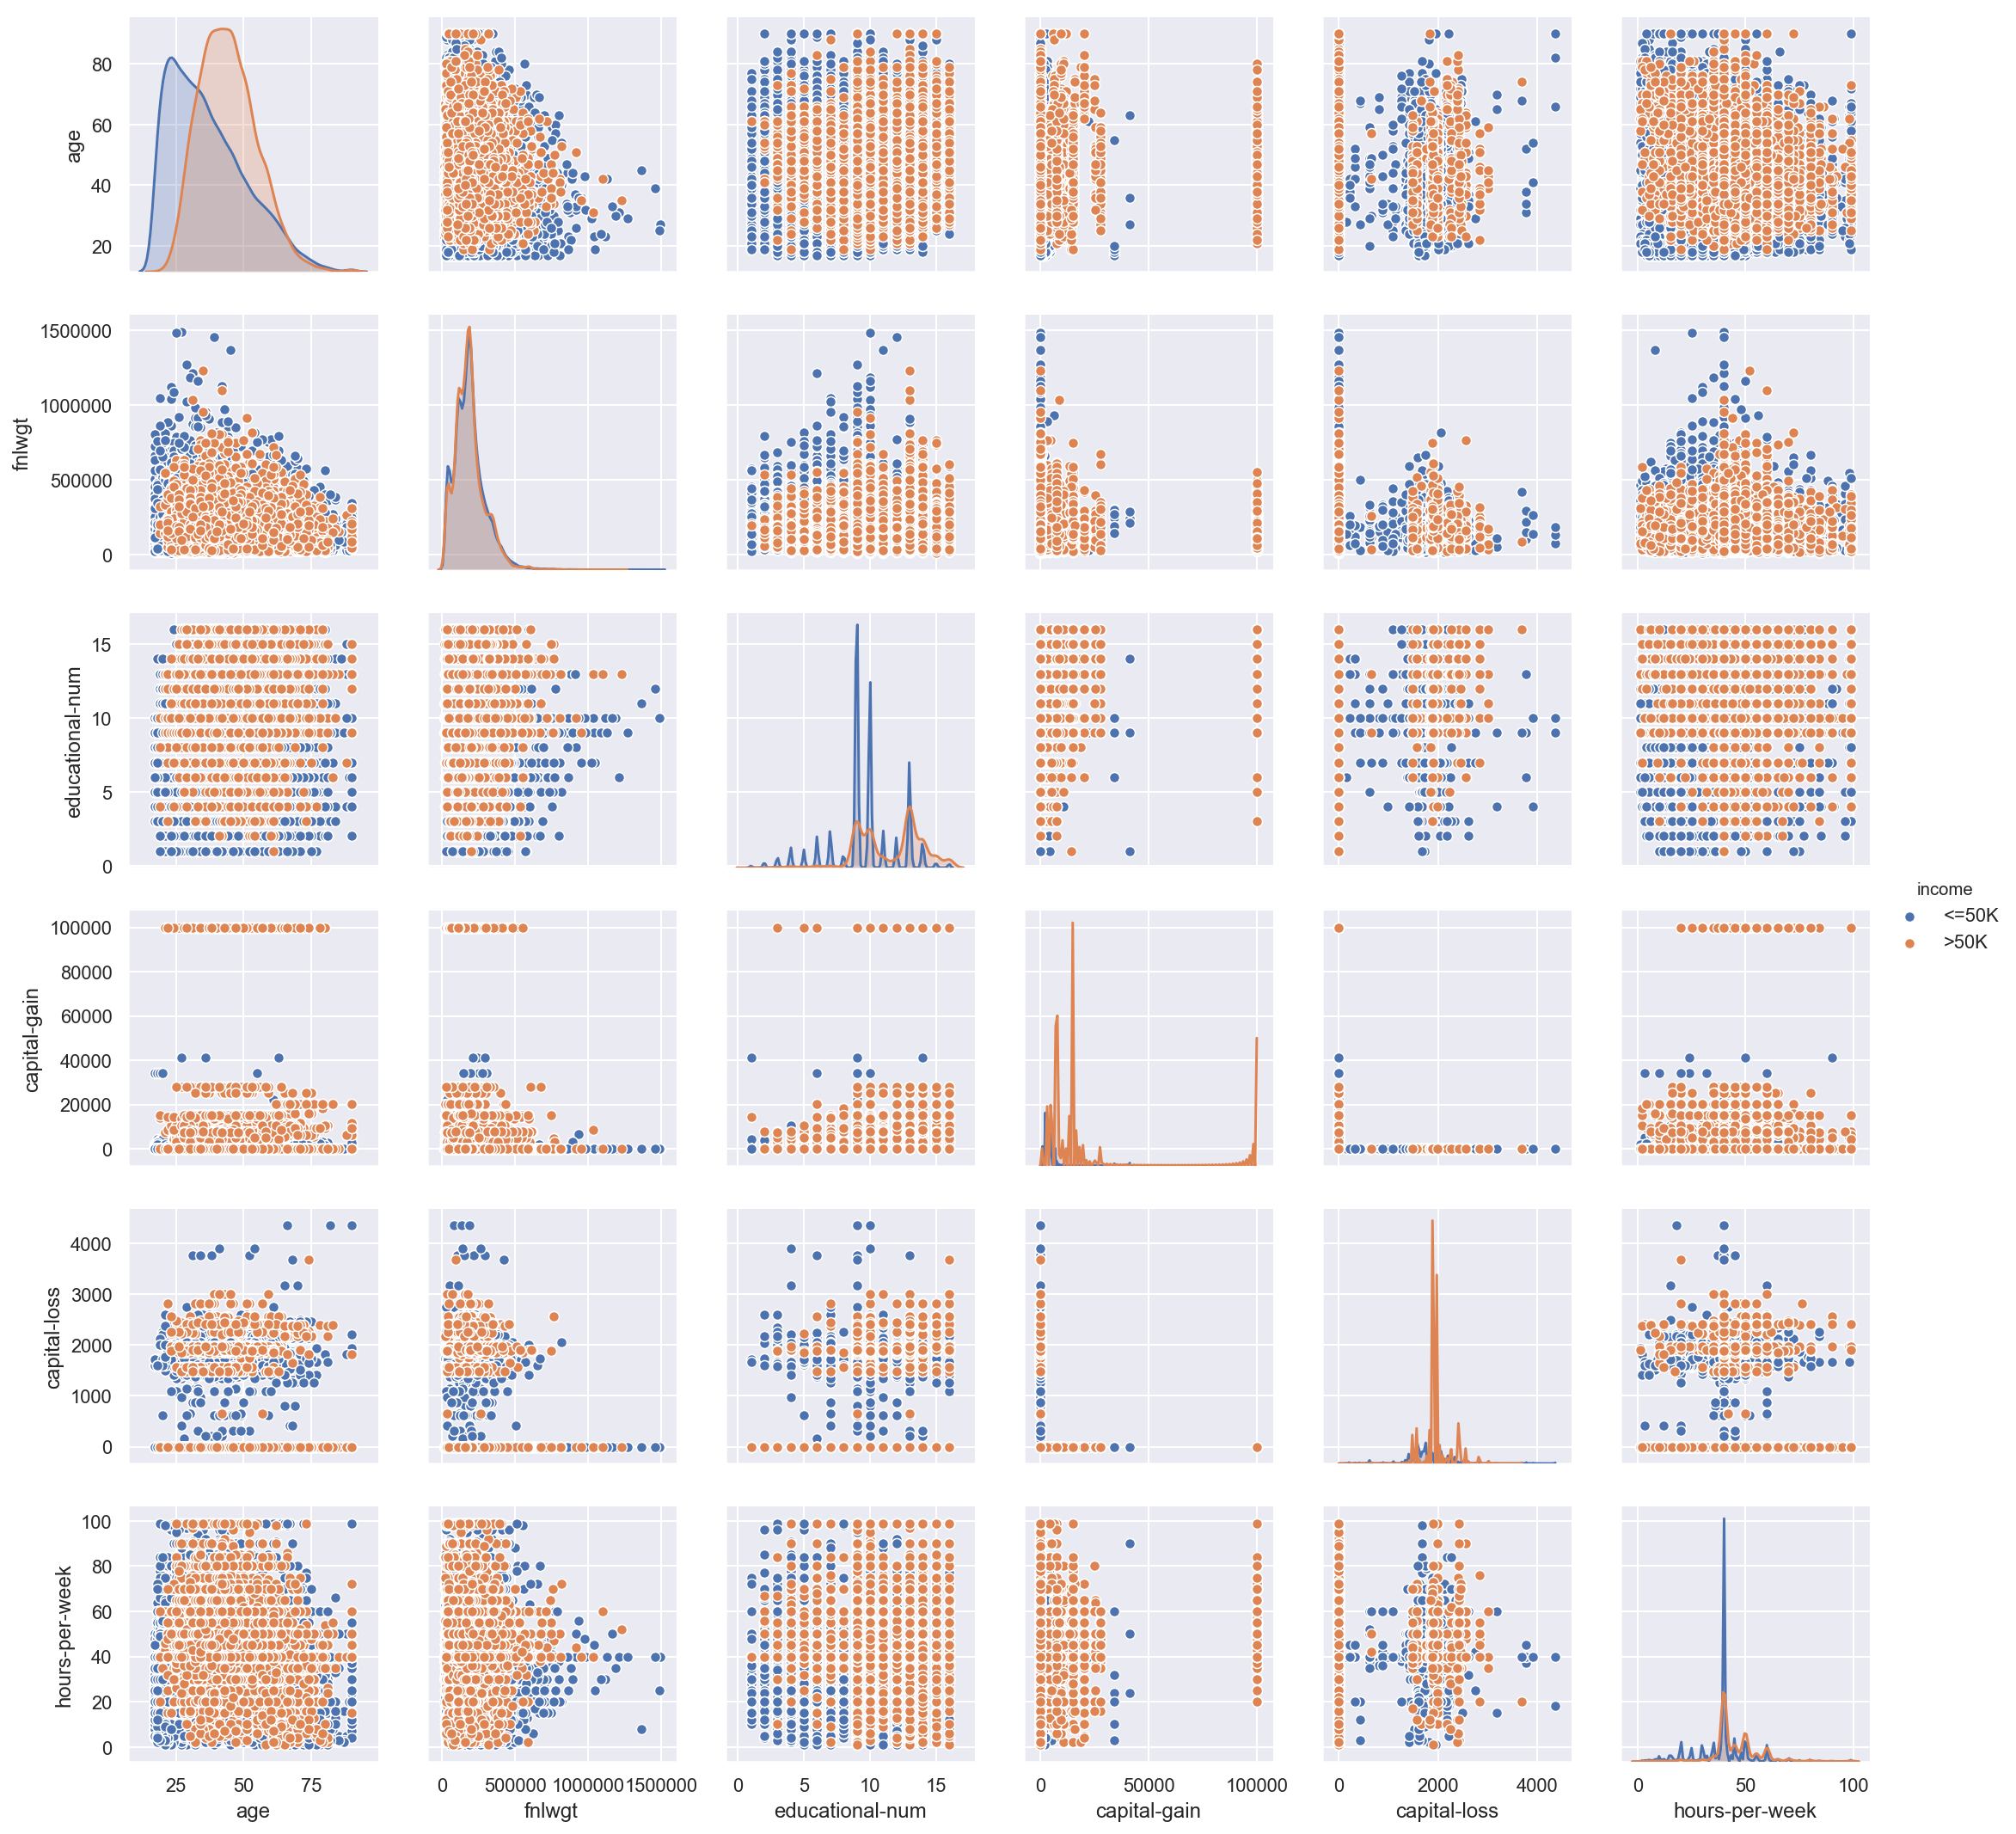

In [46]:
sns.pairplot(df, hue = 'income')

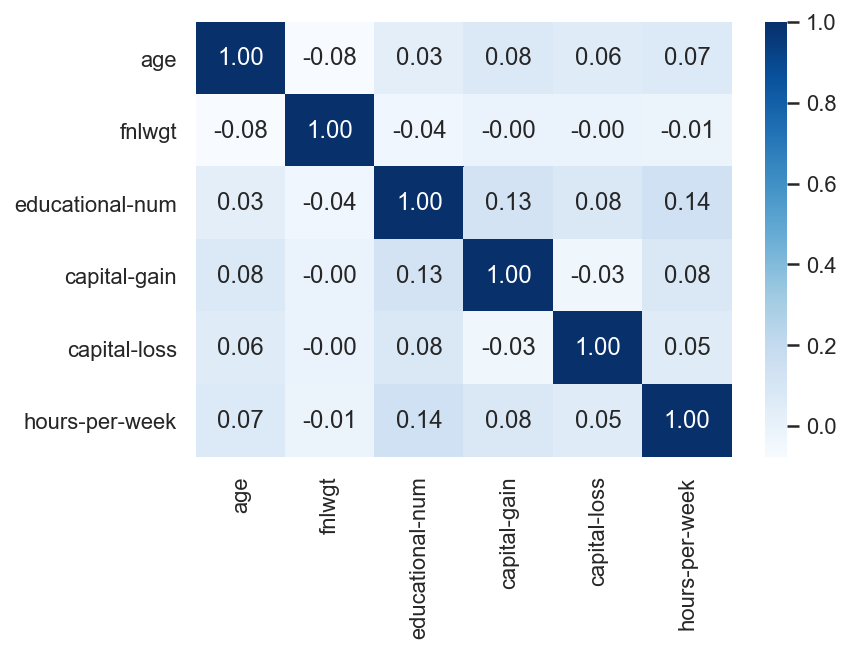

In [30]:
sns.heatmap(df.corr(), cmap = 'Blues', annot = True, fmt = '.2f')

### Pandas profiling 

Generates profile reports from a pandas DataFrame. The pandas df.describe() function is great but a little basic for serious exploratory data analysis. pandas_profiling extends the pandas DataFrame with df.profile_report() for quick data analysis.

For each column the following statistics - if relevant for the column type - are presented in an interactive HTML report:

* **Type inference**: detect the types of columns in a dataframe.
* **Essentials: type**, unique values, missing values
* **Quantile statistics** like minimum value, Q1, median, Q3, maximum, range, interquartile range
* **Descriptive statistics** like mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness
* **Most frequent values**
* **Histogram**
* **Correlations** highlighting of highly correlated variables, Spearman, Pearson and Kendall matrices
* **Missing values** matrix, count, heatmap and dendrogram of missing values
* **Text analysis** learn about categories (Uppercase, Space), scripts (Latin, Cyrillic) and blocks (ASCII) of text data.

**Use below command to install the package:**<br>
!pip install pandas_profiling --user

**To install the latest version directly from Github:**<br>

!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [2]:
from pandas_profiling import ProfileReport

In [6]:
# Loading dataset
df = pd.read_csv('adult_income.csv')
df.shape

(48842, 15)

In [7]:
profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [8]:
profile

In [9]:
#profile.to_file(output_file="pandas_profiling_report.html")